In [216]:
from mnist import MNIST
import pandas as pd
import numpy as np
from scipy.stats import norm
import math
import os
import matplotlib.pyplot as plt
import sys

In [217]:
mndata = MNIST('/Users/josenoriegaportilla/')
image_training, labels_training = mndata.load_training()
image_testing, labels_testing = mndata.load_testing()

In [218]:
image_training = np.array(image_training)
labels_training = np.array(labels_training)
print(len(image_training))
print(len(labels_training))
print(len(image_testing))
print(len(labels_testing))

60000
60000
10000
10000


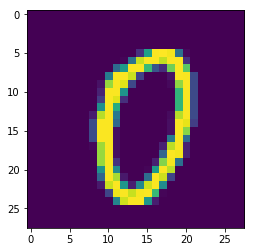

In [219]:
def show_image(pixels):
    image = pixels.reshape(28,28)
    plt.imshow(image)
    plt.show()
    
show_image(image_training[1000])

In [250]:
def covariance(images, labels, mean):
    
    class_cov = np.zeros((10, 784, 784))
    
    identity_matrix = np.identity(len(images[0]))
    identity_matrix = np.multiply(identity_matrix, 0.01)
    
    for i in range(10):
        
        print(f'Calculating Covariance for class {i}')
        
        indices = np.where(labels == i)[0]
        
        class_images = images[indices]
        
        class_mean = mean[i]
        
        for j in range(len(class_images)):
            
            print(f'Doing image {j} of class {i}')

            distance_to_mean = np.subtract(class_images[j], class_mean)
        
            product = np.outer(distance_to_mean, distance_to_mean)
            
            class_cov[i] = class_cov[i] + product            
        
        class_cov[i] = np.divide(class_cov[i], len(class_images))
        
        class_cov[i] = np.add(class_cov[i], identity_matrix)

    return class_cov
    

In [241]:
def mean(images, labels):
    mean_class = {}
    
    for i in range(10):
        
        indices = np.where(labels == i)[0]
        
        mean_class[i] = np.mean(images[indices], axis = 0)
    
    return mean_class

In [222]:
def classPrior(images, labels):
    priors = {}
    
    for i in range(10):
        
        indices = np.where(labels == i)[0]
        
        priors[i] = len(indices)/len(images)
        
    return priors

In [249]:
def guassian_term(covariance):
    
    guassian_terms = {}
    
    for i in range(10):
        class_covariance = np.array(covariance[i], dtype=np.float64)
        cov_determinant = np.linalg.det(class_covariance)
        cov_determinant = np.log(cov_determinant)
        cov_determinant = np.multiply(1/2, cov_determinant)
        
        other_term = np.multiply(-784/2, np.log(np.pi))
        
        guassian_terms[i] = np.subtract(other_term, cov_determinant)
        
    return guassian_terms

In [224]:
def likelihood(covariance, mean, prior, image_testing):
    
    other_terms = guassian_term(covariance)
    
    print('Model Training Complete')
    
    classifications = []
    
    for i in range(len(image_testing)):
        
        print(f'Classifying test image {i}')
        
        class_likelihoods = []
        
        for j in range(10):
            
            current_image = image_testing[i]
            
            class_mean = mean[j]
            class_cov = np.linalg.inv(covariance[j])
            
            mean_diff = np.subtract(current_image, class_mean)
            mean_diff_t = np.transpose(mean_diff)
            
            guassian_product = np.dot(class_cov, mean_diff)
            guassian_product = np.dot(mean_diff_t, guassian_product)
            
            class_likelihood = np.subtract(other_terms[j], guassian_product)
            class_likelihood = np.add(class_likelihood, prior[j])
            
            class_likelihoods.append(class_likelihood)
            
        classifications.append(classify(class_likelihoods))
    
    return classifications

In [225]:
def classify(class_likelihoods):
    return np.argmax(class_likelihoods)

In [240]:
def accuracy(predictions, labels_testing):
    
    print('Calculating Accuracy...')
    
    test_size = len(predictions)
    correct_predictions = 0
    
    for i in range(test_size):
        if predictions[i] == labels_testing[i]:
            correct_predictions = correct_predictions + 1 #correct_predictions += 1
            
    accuracy = correct_predictions / test_size
        
    return accuracy*100

In [242]:
def MNIST_model(image_training, labels_training, image_testing, labels_testing):
    
    class_mean = mean(image_training, labels_training)
    
    class_covariance = covariance(image_training, labels_training, class_mean)
    
    class_prior = classPrior(image_training, labels_training)
    
    predictions = likelihood(class_covariance, class_mean, class_prior, image_testing[:50]) ## classifications
    
    prediction_accuracy = accuracy(predictions, labels_testing)
    
    return prediction_accuracy
    

In [251]:
MNIST_model(image_training, labels_training, image_testing, labels_testing)

Calculating Covariance for class 0
Doing class 0
Doing class 1
Doing class 2
Doing class 3
Doing class 4
Doing class 5
Doing class 6
Doing class 7
Doing class 8
Doing class 9
Doing class 10
Doing class 11
Doing class 12
Doing class 13
Doing class 14
Doing class 15
Doing class 16
Doing class 17
Doing class 18
Doing class 19
Doing class 20
Doing class 21
Doing class 22
Doing class 23
Doing class 24
Doing class 25
Doing class 26
Doing class 27
Doing class 28
Doing class 29
Doing class 30
Doing class 31
Doing class 32
Doing class 33
Doing class 34
Doing class 35
Doing class 36
Doing class 37
Doing class 38
Doing class 39
Doing class 40
Doing class 41
Doing class 42
Doing class 43
Doing class 44
Doing class 45
Doing class 46
Doing class 47
Doing class 48
Doing class 49
Doing class 50
Doing class 51
Doing class 52
Doing class 53
Doing class 54
Doing class 55
Doing class 56
Doing class 57
Doing class 58
Doing class 59
Doing class 60
Doing class 61
Doing class 62
Doing class 63
Doing class 64


Doing class 525
Doing class 526
Doing class 527
Doing class 528
Doing class 529
Doing class 530
Doing class 531
Doing class 532
Doing class 533
Doing class 534
Doing class 535
Doing class 536
Doing class 537
Doing class 538
Doing class 539
Doing class 540
Doing class 541
Doing class 542
Doing class 543
Doing class 544
Doing class 545
Doing class 546
Doing class 547
Doing class 548
Doing class 549
Doing class 550
Doing class 551
Doing class 552
Doing class 553
Doing class 554
Doing class 555
Doing class 556
Doing class 557
Doing class 558
Doing class 559
Doing class 560
Doing class 561
Doing class 562
Doing class 563
Doing class 564
Doing class 565
Doing class 566
Doing class 567
Doing class 568
Doing class 569
Doing class 570
Doing class 571
Doing class 572
Doing class 573
Doing class 574
Doing class 575
Doing class 576
Doing class 577
Doing class 578
Doing class 579
Doing class 580
Doing class 581
Doing class 582
Doing class 583
Doing class 584
Doing class 585
Doing class 586
Doing cl

Doing class 1045
Doing class 1046
Doing class 1047
Doing class 1048
Doing class 1049
Doing class 1050
Doing class 1051
Doing class 1052
Doing class 1053
Doing class 1054
Doing class 1055
Doing class 1056
Doing class 1057
Doing class 1058
Doing class 1059
Doing class 1060
Doing class 1061
Doing class 1062
Doing class 1063
Doing class 1064
Doing class 1065
Doing class 1066
Doing class 1067
Doing class 1068
Doing class 1069
Doing class 1070
Doing class 1071
Doing class 1072
Doing class 1073
Doing class 1074
Doing class 1075
Doing class 1076
Doing class 1077
Doing class 1078
Doing class 1079
Doing class 1080
Doing class 1081
Doing class 1082
Doing class 1083
Doing class 1084
Doing class 1085
Doing class 1086
Doing class 1087
Doing class 1088
Doing class 1089
Doing class 1090
Doing class 1091
Doing class 1092
Doing class 1093
Doing class 1094
Doing class 1095
Doing class 1096
Doing class 1097
Doing class 1098
Doing class 1099
Doing class 1100
Doing class 1101
Doing class 1102
Doing class 11

Doing class 1528
Doing class 1529
Doing class 1530
Doing class 1531
Doing class 1532
Doing class 1533
Doing class 1534
Doing class 1535
Doing class 1536
Doing class 1537
Doing class 1538
Doing class 1539
Doing class 1540
Doing class 1541
Doing class 1542
Doing class 1543
Doing class 1544
Doing class 1545
Doing class 1546
Doing class 1547
Doing class 1548
Doing class 1549
Doing class 1550
Doing class 1551
Doing class 1552
Doing class 1553
Doing class 1554
Doing class 1555
Doing class 1556
Doing class 1557
Doing class 1558
Doing class 1559
Doing class 1560
Doing class 1561
Doing class 1562
Doing class 1563
Doing class 1564
Doing class 1565
Doing class 1566
Doing class 1567
Doing class 1568
Doing class 1569
Doing class 1570
Doing class 1571
Doing class 1572
Doing class 1573
Doing class 1574
Doing class 1575
Doing class 1576
Doing class 1577
Doing class 1578
Doing class 1579
Doing class 1580
Doing class 1581
Doing class 1582
Doing class 1583
Doing class 1584
Doing class 1585
Doing class 15

Doing class 2027
Doing class 2028
Doing class 2029
Doing class 2030
Doing class 2031
Doing class 2032
Doing class 2033
Doing class 2034
Doing class 2035
Doing class 2036
Doing class 2037
Doing class 2038
Doing class 2039
Doing class 2040
Doing class 2041
Doing class 2042
Doing class 2043
Doing class 2044
Doing class 2045
Doing class 2046
Doing class 2047
Doing class 2048
Doing class 2049
Doing class 2050
Doing class 2051
Doing class 2052
Doing class 2053
Doing class 2054
Doing class 2055
Doing class 2056
Doing class 2057
Doing class 2058
Doing class 2059
Doing class 2060
Doing class 2061
Doing class 2062
Doing class 2063
Doing class 2064
Doing class 2065
Doing class 2066
Doing class 2067
Doing class 2068
Doing class 2069
Doing class 2070
Doing class 2071
Doing class 2072
Doing class 2073
Doing class 2074
Doing class 2075
Doing class 2076
Doing class 2077
Doing class 2078
Doing class 2079
Doing class 2080
Doing class 2081
Doing class 2082
Doing class 2083
Doing class 2084
Doing class 20

Doing class 2542
Doing class 2543
Doing class 2544
Doing class 2545
Doing class 2546
Doing class 2547
Doing class 2548
Doing class 2549
Doing class 2550
Doing class 2551
Doing class 2552
Doing class 2553
Doing class 2554
Doing class 2555
Doing class 2556
Doing class 2557
Doing class 2558
Doing class 2559
Doing class 2560
Doing class 2561
Doing class 2562
Doing class 2563
Doing class 2564
Doing class 2565
Doing class 2566
Doing class 2567
Doing class 2568
Doing class 2569
Doing class 2570
Doing class 2571
Doing class 2572
Doing class 2573
Doing class 2574
Doing class 2575
Doing class 2576
Doing class 2577
Doing class 2578
Doing class 2579
Doing class 2580
Doing class 2581
Doing class 2582
Doing class 2583
Doing class 2584
Doing class 2585
Doing class 2586
Doing class 2587
Doing class 2588
Doing class 2589
Doing class 2590
Doing class 2591
Doing class 2592
Doing class 2593
Doing class 2594
Doing class 2595
Doing class 2596
Doing class 2597
Doing class 2598
Doing class 2599
Doing class 26

Doing class 3025
Doing class 3026
Doing class 3027
Doing class 3028
Doing class 3029
Doing class 3030
Doing class 3031
Doing class 3032
Doing class 3033
Doing class 3034
Doing class 3035
Doing class 3036
Doing class 3037
Doing class 3038
Doing class 3039
Doing class 3040
Doing class 3041
Doing class 3042
Doing class 3043
Doing class 3044
Doing class 3045
Doing class 3046
Doing class 3047
Doing class 3048
Doing class 3049
Doing class 3050
Doing class 3051
Doing class 3052
Doing class 3053
Doing class 3054
Doing class 3055
Doing class 3056
Doing class 3057
Doing class 3058
Doing class 3059
Doing class 3060
Doing class 3061
Doing class 3062
Doing class 3063
Doing class 3064
Doing class 3065
Doing class 3066
Doing class 3067
Doing class 3068
Doing class 3069
Doing class 3070
Doing class 3071
Doing class 3072
Doing class 3073
Doing class 3074
Doing class 3075
Doing class 3076
Doing class 3077
Doing class 3078
Doing class 3079
Doing class 3080
Doing class 3081
Doing class 3082
Doing class 30

Doing class 3521
Doing class 3522
Doing class 3523
Doing class 3524
Doing class 3525
Doing class 3526
Doing class 3527
Doing class 3528
Doing class 3529
Doing class 3530
Doing class 3531
Doing class 3532
Doing class 3533
Doing class 3534
Doing class 3535
Doing class 3536
Doing class 3537
Doing class 3538
Doing class 3539
Doing class 3540
Doing class 3541
Doing class 3542
Doing class 3543
Doing class 3544
Doing class 3545
Doing class 3546
Doing class 3547
Doing class 3548
Doing class 3549
Doing class 3550
Doing class 3551
Doing class 3552
Doing class 3553
Doing class 3554
Doing class 3555
Doing class 3556
Doing class 3557
Doing class 3558
Doing class 3559
Doing class 3560
Doing class 3561
Doing class 3562
Doing class 3563
Doing class 3564
Doing class 3565
Doing class 3566
Doing class 3567
Doing class 3568
Doing class 3569
Doing class 3570
Doing class 3571
Doing class 3572
Doing class 3573
Doing class 3574
Doing class 3575
Doing class 3576
Doing class 3577
Doing class 3578
Doing class 35

Doing class 4017
Doing class 4018
Doing class 4019
Doing class 4020
Doing class 4021
Doing class 4022
Doing class 4023
Doing class 4024
Doing class 4025
Doing class 4026
Doing class 4027
Doing class 4028
Doing class 4029
Doing class 4030
Doing class 4031
Doing class 4032
Doing class 4033
Doing class 4034
Doing class 4035
Doing class 4036
Doing class 4037
Doing class 4038
Doing class 4039
Doing class 4040
Doing class 4041
Doing class 4042
Doing class 4043
Doing class 4044
Doing class 4045
Doing class 4046
Doing class 4047
Doing class 4048
Doing class 4049
Doing class 4050
Doing class 4051
Doing class 4052
Doing class 4053
Doing class 4054
Doing class 4055
Doing class 4056
Doing class 4057
Doing class 4058
Doing class 4059
Doing class 4060
Doing class 4061
Doing class 4062
Doing class 4063
Doing class 4064
Doing class 4065
Doing class 4066
Doing class 4067
Doing class 4068
Doing class 4069
Doing class 4070
Doing class 4071
Doing class 4072
Doing class 4073
Doing class 4074
Doing class 40

Doing class 4541
Doing class 4542
Doing class 4543
Doing class 4544
Doing class 4545
Doing class 4546
Doing class 4547
Doing class 4548
Doing class 4549
Doing class 4550
Doing class 4551
Doing class 4552
Doing class 4553
Doing class 4554
Doing class 4555
Doing class 4556
Doing class 4557
Doing class 4558
Doing class 4559
Doing class 4560
Doing class 4561
Doing class 4562
Doing class 4563
Doing class 4564
Doing class 4565
Doing class 4566
Doing class 4567
Doing class 4568
Doing class 4569
Doing class 4570
Doing class 4571
Doing class 4572
Doing class 4573
Doing class 4574
Doing class 4575
Doing class 4576
Doing class 4577
Doing class 4578
Doing class 4579
Doing class 4580
Doing class 4581
Doing class 4582
Doing class 4583
Doing class 4584
Doing class 4585
Doing class 4586
Doing class 4587
Doing class 4588
Doing class 4589
Doing class 4590
Doing class 4591
Doing class 4592
Doing class 4593
Doing class 4594
Doing class 4595
Doing class 4596
Doing class 4597
Doing class 4598
Doing class 45

Doing class 5058
Doing class 5059
Doing class 5060
Doing class 5061
Doing class 5062
Doing class 5063
Doing class 5064
Doing class 5065
Doing class 5066
Doing class 5067
Doing class 5068
Doing class 5069
Doing class 5070
Doing class 5071
Doing class 5072
Doing class 5073
Doing class 5074
Doing class 5075
Doing class 5076
Doing class 5077
Doing class 5078
Doing class 5079
Doing class 5080
Doing class 5081
Doing class 5082
Doing class 5083
Doing class 5084
Doing class 5085
Doing class 5086
Doing class 5087
Doing class 5088
Doing class 5089
Doing class 5090
Doing class 5091
Doing class 5092
Doing class 5093
Doing class 5094
Doing class 5095
Doing class 5096
Doing class 5097
Doing class 5098
Doing class 5099
Doing class 5100
Doing class 5101
Doing class 5102
Doing class 5103
Doing class 5104
Doing class 5105
Doing class 5106
Doing class 5107
Doing class 5108
Doing class 5109
Doing class 5110
Doing class 5111
Doing class 5112
Doing class 5113
Doing class 5114
Doing class 5115
Doing class 51

Doing class 5569
Doing class 5570
Doing class 5571
Doing class 5572
Doing class 5573
Doing class 5574
Doing class 5575
Doing class 5576
Doing class 5577
Doing class 5578
Doing class 5579
Doing class 5580
Doing class 5581
Doing class 5582
Doing class 5583
Doing class 5584
Doing class 5585
Doing class 5586
Doing class 5587
Doing class 5588
Doing class 5589
Doing class 5590
Doing class 5591
Doing class 5592
Doing class 5593
Doing class 5594
Doing class 5595
Doing class 5596
Doing class 5597
Doing class 5598
Doing class 5599
Doing class 5600
Doing class 5601
Doing class 5602
Doing class 5603
Doing class 5604
Doing class 5605
Doing class 5606
Doing class 5607
Doing class 5608
Doing class 5609
Doing class 5610
Doing class 5611
Doing class 5612
Doing class 5613
Doing class 5614
Doing class 5615
Doing class 5616
Doing class 5617
Doing class 5618
Doing class 5619
Doing class 5620
Doing class 5621
Doing class 5622
Doing class 5623
Doing class 5624
Doing class 5625
Doing class 5626
Doing class 56

Doing class 163
Doing class 164
Doing class 165
Doing class 166
Doing class 167
Doing class 168
Doing class 169
Doing class 170
Doing class 171
Doing class 172
Doing class 173
Doing class 174
Doing class 175
Doing class 176
Doing class 177
Doing class 178
Doing class 179
Doing class 180
Doing class 181
Doing class 182
Doing class 183
Doing class 184
Doing class 185
Doing class 186
Doing class 187
Doing class 188
Doing class 189
Doing class 190
Doing class 191
Doing class 192
Doing class 193
Doing class 194
Doing class 195
Doing class 196
Doing class 197
Doing class 198
Doing class 199
Doing class 200
Doing class 201
Doing class 202
Doing class 203
Doing class 204
Doing class 205
Doing class 206
Doing class 207
Doing class 208
Doing class 209
Doing class 210
Doing class 211
Doing class 212
Doing class 213
Doing class 214
Doing class 215
Doing class 216
Doing class 217
Doing class 218
Doing class 219
Doing class 220
Doing class 221
Doing class 222
Doing class 223
Doing class 224
Doing cl

Doing class 682
Doing class 683
Doing class 684
Doing class 685
Doing class 686
Doing class 687
Doing class 688
Doing class 689
Doing class 690
Doing class 691
Doing class 692
Doing class 693
Doing class 694
Doing class 695
Doing class 696
Doing class 697
Doing class 698
Doing class 699
Doing class 700
Doing class 701
Doing class 702
Doing class 703
Doing class 704
Doing class 705
Doing class 706
Doing class 707
Doing class 708
Doing class 709
Doing class 710
Doing class 711
Doing class 712
Doing class 713
Doing class 714
Doing class 715
Doing class 716
Doing class 717
Doing class 718
Doing class 719
Doing class 720
Doing class 721
Doing class 722
Doing class 723
Doing class 724
Doing class 725
Doing class 726
Doing class 727
Doing class 728
Doing class 729
Doing class 730
Doing class 731
Doing class 732
Doing class 733
Doing class 734
Doing class 735
Doing class 736
Doing class 737
Doing class 738
Doing class 739
Doing class 740
Doing class 741
Doing class 742
Doing class 743
Doing cl

Doing class 1192
Doing class 1193
Doing class 1194
Doing class 1195
Doing class 1196
Doing class 1197
Doing class 1198
Doing class 1199
Doing class 1200
Doing class 1201
Doing class 1202
Doing class 1203
Doing class 1204
Doing class 1205
Doing class 1206
Doing class 1207
Doing class 1208
Doing class 1209
Doing class 1210
Doing class 1211
Doing class 1212
Doing class 1213
Doing class 1214
Doing class 1215
Doing class 1216
Doing class 1217
Doing class 1218
Doing class 1219
Doing class 1220
Doing class 1221
Doing class 1222
Doing class 1223
Doing class 1224
Doing class 1225
Doing class 1226
Doing class 1227
Doing class 1228
Doing class 1229
Doing class 1230
Doing class 1231
Doing class 1232
Doing class 1233
Doing class 1234
Doing class 1235
Doing class 1236
Doing class 1237
Doing class 1238
Doing class 1239
Doing class 1240
Doing class 1241
Doing class 1242
Doing class 1243
Doing class 1244
Doing class 1245
Doing class 1246
Doing class 1247
Doing class 1248
Doing class 1249
Doing class 12

Doing class 1674
Doing class 1675
Doing class 1676
Doing class 1677
Doing class 1678
Doing class 1679
Doing class 1680
Doing class 1681
Doing class 1682
Doing class 1683
Doing class 1684
Doing class 1685
Doing class 1686
Doing class 1687
Doing class 1688
Doing class 1689
Doing class 1690
Doing class 1691
Doing class 1692
Doing class 1693
Doing class 1694
Doing class 1695
Doing class 1696
Doing class 1697
Doing class 1698
Doing class 1699
Doing class 1700
Doing class 1701
Doing class 1702
Doing class 1703
Doing class 1704
Doing class 1705
Doing class 1706
Doing class 1707
Doing class 1708
Doing class 1709
Doing class 1710
Doing class 1711
Doing class 1712
Doing class 1713
Doing class 1714
Doing class 1715
Doing class 1716
Doing class 1717
Doing class 1718
Doing class 1719
Doing class 1720
Doing class 1721
Doing class 1722
Doing class 1723
Doing class 1724
Doing class 1725
Doing class 1726
Doing class 1727
Doing class 1728
Doing class 1729
Doing class 1730
Doing class 1731
Doing class 17

Doing class 2179
Doing class 2180
Doing class 2181
Doing class 2182
Doing class 2183
Doing class 2184
Doing class 2185
Doing class 2186
Doing class 2187
Doing class 2188
Doing class 2189
Doing class 2190
Doing class 2191
Doing class 2192
Doing class 2193
Doing class 2194
Doing class 2195
Doing class 2196
Doing class 2197
Doing class 2198
Doing class 2199
Doing class 2200
Doing class 2201
Doing class 2202
Doing class 2203
Doing class 2204
Doing class 2205
Doing class 2206
Doing class 2207
Doing class 2208
Doing class 2209
Doing class 2210
Doing class 2211
Doing class 2212
Doing class 2213
Doing class 2214
Doing class 2215
Doing class 2216
Doing class 2217
Doing class 2218
Doing class 2219
Doing class 2220
Doing class 2221
Doing class 2222
Doing class 2223
Doing class 2224
Doing class 2225
Doing class 2226
Doing class 2227
Doing class 2228
Doing class 2229
Doing class 2230
Doing class 2231
Doing class 2232
Doing class 2233
Doing class 2234
Doing class 2235
Doing class 2236
Doing class 22

Doing class 2701
Doing class 2702
Doing class 2703
Doing class 2704
Doing class 2705
Doing class 2706
Doing class 2707
Doing class 2708
Doing class 2709
Doing class 2710
Doing class 2711
Doing class 2712
Doing class 2713
Doing class 2714
Doing class 2715
Doing class 2716
Doing class 2717
Doing class 2718
Doing class 2719
Doing class 2720
Doing class 2721
Doing class 2722
Doing class 2723
Doing class 2724
Doing class 2725
Doing class 2726
Doing class 2727
Doing class 2728
Doing class 2729
Doing class 2730
Doing class 2731
Doing class 2732
Doing class 2733
Doing class 2734
Doing class 2735
Doing class 2736
Doing class 2737
Doing class 2738
Doing class 2739
Doing class 2740
Doing class 2741
Doing class 2742
Doing class 2743
Doing class 2744
Doing class 2745
Doing class 2746
Doing class 2747
Doing class 2748
Doing class 2749
Doing class 2750
Doing class 2751
Doing class 2752
Doing class 2753
Doing class 2754
Doing class 2755
Doing class 2756
Doing class 2757
Doing class 2758
Doing class 27

Doing class 3189
Doing class 3190
Doing class 3191
Doing class 3192
Doing class 3193
Doing class 3194
Doing class 3195
Doing class 3196
Doing class 3197
Doing class 3198
Doing class 3199
Doing class 3200
Doing class 3201
Doing class 3202
Doing class 3203
Doing class 3204
Doing class 3205
Doing class 3206
Doing class 3207
Doing class 3208
Doing class 3209
Doing class 3210
Doing class 3211
Doing class 3212
Doing class 3213
Doing class 3214
Doing class 3215
Doing class 3216
Doing class 3217
Doing class 3218
Doing class 3219
Doing class 3220
Doing class 3221
Doing class 3222
Doing class 3223
Doing class 3224
Doing class 3225
Doing class 3226
Doing class 3227
Doing class 3228
Doing class 3229
Doing class 3230
Doing class 3231
Doing class 3232
Doing class 3233
Doing class 3234
Doing class 3235
Doing class 3236
Doing class 3237
Doing class 3238
Doing class 3239
Doing class 3240
Doing class 3241
Doing class 3242
Doing class 3243
Doing class 3244
Doing class 3245
Doing class 3246
Doing class 32

Doing class 3674
Doing class 3675
Doing class 3676
Doing class 3677
Doing class 3678
Doing class 3679
Doing class 3680
Doing class 3681
Doing class 3682
Doing class 3683
Doing class 3684
Doing class 3685
Doing class 3686
Doing class 3687
Doing class 3688
Doing class 3689
Doing class 3690
Doing class 3691
Doing class 3692
Doing class 3693
Doing class 3694
Doing class 3695
Doing class 3696
Doing class 3697
Doing class 3698
Doing class 3699
Doing class 3700
Doing class 3701
Doing class 3702
Doing class 3703
Doing class 3704
Doing class 3705
Doing class 3706
Doing class 3707
Doing class 3708
Doing class 3709
Doing class 3710
Doing class 3711
Doing class 3712
Doing class 3713
Doing class 3714
Doing class 3715
Doing class 3716
Doing class 3717
Doing class 3718
Doing class 3719
Doing class 3720
Doing class 3721
Doing class 3722
Doing class 3723
Doing class 3724
Doing class 3725
Doing class 3726
Doing class 3727
Doing class 3728
Doing class 3729
Doing class 3730
Doing class 3731
Doing class 37

Doing class 4175
Doing class 4176
Doing class 4177
Doing class 4178
Doing class 4179
Doing class 4180
Doing class 4181
Doing class 4182
Doing class 4183
Doing class 4184
Doing class 4185
Doing class 4186
Doing class 4187
Doing class 4188
Doing class 4189
Doing class 4190
Doing class 4191
Doing class 4192
Doing class 4193
Doing class 4194
Doing class 4195
Doing class 4196
Doing class 4197
Doing class 4198
Doing class 4199
Doing class 4200
Doing class 4201
Doing class 4202
Doing class 4203
Doing class 4204
Doing class 4205
Doing class 4206
Doing class 4207
Doing class 4208
Doing class 4209
Doing class 4210
Doing class 4211
Doing class 4212
Doing class 4213
Doing class 4214
Doing class 4215
Doing class 4216
Doing class 4217
Doing class 4218
Doing class 4219
Doing class 4220
Doing class 4221
Doing class 4222
Doing class 4223
Doing class 4224
Doing class 4225
Doing class 4226
Doing class 4227
Doing class 4228
Doing class 4229
Doing class 4230
Doing class 4231
Doing class 4232
Doing class 42

Doing class 4686
Doing class 4687
Doing class 4688
Doing class 4689
Doing class 4690
Doing class 4691
Doing class 4692
Doing class 4693
Doing class 4694
Doing class 4695
Doing class 4696
Doing class 4697
Doing class 4698
Doing class 4699
Doing class 4700
Doing class 4701
Doing class 4702
Doing class 4703
Doing class 4704
Doing class 4705
Doing class 4706
Doing class 4707
Doing class 4708
Doing class 4709
Doing class 4710
Doing class 4711
Doing class 4712
Doing class 4713
Doing class 4714
Doing class 4715
Doing class 4716
Doing class 4717
Doing class 4718
Doing class 4719
Doing class 4720
Doing class 4721
Doing class 4722
Doing class 4723
Doing class 4724
Doing class 4725
Doing class 4726
Doing class 4727
Doing class 4728
Doing class 4729
Doing class 4730
Doing class 4731
Doing class 4732
Doing class 4733
Doing class 4734
Doing class 4735
Doing class 4736
Doing class 4737
Doing class 4738
Doing class 4739
Doing class 4740
Doing class 4741
Doing class 4742
Doing class 4743
Doing class 47

Doing class 5184
Doing class 5185
Doing class 5186
Doing class 5187
Doing class 5188
Doing class 5189
Doing class 5190
Doing class 5191
Doing class 5192
Doing class 5193
Doing class 5194
Doing class 5195
Doing class 5196
Doing class 5197
Doing class 5198
Doing class 5199
Doing class 5200
Doing class 5201
Doing class 5202
Doing class 5203
Doing class 5204
Doing class 5205
Doing class 5206
Doing class 5207
Doing class 5208
Doing class 5209
Doing class 5210
Doing class 5211
Doing class 5212
Doing class 5213
Doing class 5214
Doing class 5215
Doing class 5216
Doing class 5217
Doing class 5218
Doing class 5219
Doing class 5220
Doing class 5221
Doing class 5222
Doing class 5223
Doing class 5224
Doing class 5225
Doing class 5226
Doing class 5227
Doing class 5228
Doing class 5229
Doing class 5230
Doing class 5231
Doing class 5232
Doing class 5233
Doing class 5234
Doing class 5235
Doing class 5236
Doing class 5237
Doing class 5238
Doing class 5239
Doing class 5240
Doing class 5241
Doing class 52

Doing class 5688
Doing class 5689
Doing class 5690
Doing class 5691
Doing class 5692
Doing class 5693
Doing class 5694
Doing class 5695
Doing class 5696
Doing class 5697
Doing class 5698
Doing class 5699
Doing class 5700
Doing class 5701
Doing class 5702
Doing class 5703
Doing class 5704
Doing class 5705
Doing class 5706
Doing class 5707
Doing class 5708
Doing class 5709
Doing class 5710
Doing class 5711
Doing class 5712
Doing class 5713
Doing class 5714
Doing class 5715
Doing class 5716
Doing class 5717
Doing class 5718
Doing class 5719
Doing class 5720
Doing class 5721
Doing class 5722
Doing class 5723
Doing class 5724
Doing class 5725
Doing class 5726
Doing class 5727
Doing class 5728
Doing class 5729
Doing class 5730
Doing class 5731
Doing class 5732
Doing class 5733
Doing class 5734
Doing class 5735
Doing class 5736
Doing class 5737
Doing class 5738
Doing class 5739
Doing class 5740
Doing class 5741
Doing class 5742
Doing class 5743
Doing class 5744
Doing class 5745
Doing class 57

Doing class 6201
Doing class 6202
Doing class 6203
Doing class 6204
Doing class 6205
Doing class 6206
Doing class 6207
Doing class 6208
Doing class 6209
Doing class 6210
Doing class 6211
Doing class 6212
Doing class 6213
Doing class 6214
Doing class 6215
Doing class 6216
Doing class 6217
Doing class 6218
Doing class 6219
Doing class 6220
Doing class 6221
Doing class 6222
Doing class 6223
Doing class 6224
Doing class 6225
Doing class 6226
Doing class 6227
Doing class 6228
Doing class 6229
Doing class 6230
Doing class 6231
Doing class 6232
Doing class 6233
Doing class 6234
Doing class 6235
Doing class 6236
Doing class 6237
Doing class 6238
Doing class 6239
Doing class 6240
Doing class 6241
Doing class 6242
Doing class 6243
Doing class 6244
Doing class 6245
Doing class 6246
Doing class 6247
Doing class 6248
Doing class 6249
Doing class 6250
Doing class 6251
Doing class 6252
Doing class 6253
Doing class 6254
Doing class 6255
Doing class 6256
Doing class 6257
Doing class 6258
Doing class 62

Doing class 6709
Doing class 6710
Doing class 6711
Doing class 6712
Doing class 6713
Doing class 6714
Doing class 6715
Doing class 6716
Doing class 6717
Doing class 6718
Doing class 6719
Doing class 6720
Doing class 6721
Doing class 6722
Doing class 6723
Doing class 6724
Doing class 6725
Doing class 6726
Doing class 6727
Doing class 6728
Doing class 6729
Doing class 6730
Doing class 6731
Doing class 6732
Doing class 6733
Doing class 6734
Doing class 6735
Doing class 6736
Doing class 6737
Doing class 6738
Doing class 6739
Doing class 6740
Doing class 6741
Calculating Covariance for class 2
Doing class 0
Doing class 1
Doing class 2
Doing class 3
Doing class 4
Doing class 5
Doing class 6
Doing class 7
Doing class 8
Doing class 9
Doing class 10
Doing class 11
Doing class 12
Doing class 13
Doing class 14
Doing class 15
Doing class 16
Doing class 17
Doing class 18
Doing class 19
Doing class 20
Doing class 21
Doing class 22
Doing class 23
Doing class 24
Doing class 25
Doing class 26
Doing cla

Doing class 511
Doing class 512
Doing class 513
Doing class 514
Doing class 515
Doing class 516
Doing class 517
Doing class 518
Doing class 519
Doing class 520
Doing class 521
Doing class 522
Doing class 523
Doing class 524
Doing class 525
Doing class 526
Doing class 527
Doing class 528
Doing class 529
Doing class 530
Doing class 531
Doing class 532
Doing class 533
Doing class 534
Doing class 535
Doing class 536
Doing class 537
Doing class 538
Doing class 539
Doing class 540
Doing class 541
Doing class 542
Doing class 543
Doing class 544
Doing class 545
Doing class 546
Doing class 547
Doing class 548
Doing class 549
Doing class 550
Doing class 551
Doing class 552
Doing class 553
Doing class 554
Doing class 555
Doing class 556
Doing class 557
Doing class 558
Doing class 559
Doing class 560
Doing class 561
Doing class 562
Doing class 563
Doing class 564
Doing class 565
Doing class 566
Doing class 567
Doing class 568
Doing class 569
Doing class 570
Doing class 571
Doing class 572
Doing cl

Doing class 1043
Doing class 1044
Doing class 1045
Doing class 1046
Doing class 1047
Doing class 1048
Doing class 1049
Doing class 1050
Doing class 1051
Doing class 1052
Doing class 1053
Doing class 1054
Doing class 1055
Doing class 1056
Doing class 1057
Doing class 1058
Doing class 1059
Doing class 1060
Doing class 1061
Doing class 1062
Doing class 1063
Doing class 1064
Doing class 1065
Doing class 1066
Doing class 1067
Doing class 1068
Doing class 1069
Doing class 1070
Doing class 1071
Doing class 1072
Doing class 1073
Doing class 1074
Doing class 1075
Doing class 1076
Doing class 1077
Doing class 1078
Doing class 1079
Doing class 1080
Doing class 1081
Doing class 1082
Doing class 1083
Doing class 1084
Doing class 1085
Doing class 1086
Doing class 1087
Doing class 1088
Doing class 1089
Doing class 1090
Doing class 1091
Doing class 1092
Doing class 1093
Doing class 1094
Doing class 1095
Doing class 1096
Doing class 1097
Doing class 1098
Doing class 1099
Doing class 1100
Doing class 11

Doing class 1532
Doing class 1533
Doing class 1534
Doing class 1535
Doing class 1536
Doing class 1537
Doing class 1538
Doing class 1539
Doing class 1540
Doing class 1541
Doing class 1542
Doing class 1543
Doing class 1544
Doing class 1545
Doing class 1546
Doing class 1547
Doing class 1548
Doing class 1549
Doing class 1550
Doing class 1551
Doing class 1552
Doing class 1553
Doing class 1554
Doing class 1555
Doing class 1556
Doing class 1557
Doing class 1558
Doing class 1559
Doing class 1560
Doing class 1561
Doing class 1562
Doing class 1563
Doing class 1564
Doing class 1565
Doing class 1566
Doing class 1567
Doing class 1568
Doing class 1569
Doing class 1570
Doing class 1571
Doing class 1572
Doing class 1573
Doing class 1574
Doing class 1575
Doing class 1576
Doing class 1577
Doing class 1578
Doing class 1579
Doing class 1580
Doing class 1581
Doing class 1582
Doing class 1583
Doing class 1584
Doing class 1585
Doing class 1586
Doing class 1587
Doing class 1588
Doing class 1589
Doing class 15

Doing class 2023
Doing class 2024
Doing class 2025
Doing class 2026
Doing class 2027
Doing class 2028
Doing class 2029
Doing class 2030
Doing class 2031
Doing class 2032
Doing class 2033
Doing class 2034
Doing class 2035
Doing class 2036
Doing class 2037
Doing class 2038
Doing class 2039
Doing class 2040
Doing class 2041
Doing class 2042
Doing class 2043
Doing class 2044
Doing class 2045
Doing class 2046
Doing class 2047
Doing class 2048
Doing class 2049
Doing class 2050
Doing class 2051
Doing class 2052
Doing class 2053
Doing class 2054
Doing class 2055
Doing class 2056
Doing class 2057
Doing class 2058
Doing class 2059
Doing class 2060
Doing class 2061
Doing class 2062
Doing class 2063
Doing class 2064
Doing class 2065
Doing class 2066
Doing class 2067
Doing class 2068
Doing class 2069
Doing class 2070
Doing class 2071
Doing class 2072
Doing class 2073
Doing class 2074
Doing class 2075
Doing class 2076
Doing class 2077
Doing class 2078
Doing class 2079
Doing class 2080
Doing class 20

Doing class 2518
Doing class 2519
Doing class 2520
Doing class 2521
Doing class 2522
Doing class 2523
Doing class 2524
Doing class 2525
Doing class 2526
Doing class 2527
Doing class 2528
Doing class 2529
Doing class 2530
Doing class 2531
Doing class 2532
Doing class 2533
Doing class 2534
Doing class 2535
Doing class 2536
Doing class 2537
Doing class 2538
Doing class 2539
Doing class 2540
Doing class 2541
Doing class 2542
Doing class 2543
Doing class 2544
Doing class 2545
Doing class 2546
Doing class 2547
Doing class 2548
Doing class 2549
Doing class 2550
Doing class 2551
Doing class 2552
Doing class 2553
Doing class 2554
Doing class 2555
Doing class 2556
Doing class 2557
Doing class 2558
Doing class 2559
Doing class 2560
Doing class 2561
Doing class 2562
Doing class 2563
Doing class 2564
Doing class 2565
Doing class 2566
Doing class 2567
Doing class 2568
Doing class 2569
Doing class 2570
Doing class 2571
Doing class 2572
Doing class 2573
Doing class 2574
Doing class 2575
Doing class 25

Doing class 3025
Doing class 3026
Doing class 3027
Doing class 3028
Doing class 3029
Doing class 3030
Doing class 3031
Doing class 3032
Doing class 3033
Doing class 3034
Doing class 3035
Doing class 3036
Doing class 3037
Doing class 3038
Doing class 3039
Doing class 3040
Doing class 3041
Doing class 3042
Doing class 3043
Doing class 3044
Doing class 3045
Doing class 3046
Doing class 3047
Doing class 3048
Doing class 3049
Doing class 3050
Doing class 3051
Doing class 3052
Doing class 3053
Doing class 3054
Doing class 3055
Doing class 3056
Doing class 3057
Doing class 3058
Doing class 3059
Doing class 3060
Doing class 3061
Doing class 3062
Doing class 3063
Doing class 3064
Doing class 3065
Doing class 3066
Doing class 3067
Doing class 3068
Doing class 3069
Doing class 3070
Doing class 3071
Doing class 3072
Doing class 3073
Doing class 3074
Doing class 3075
Doing class 3076
Doing class 3077
Doing class 3078
Doing class 3079
Doing class 3080
Doing class 3081
Doing class 3082
Doing class 30

Doing class 3547
Doing class 3548
Doing class 3549
Doing class 3550
Doing class 3551
Doing class 3552
Doing class 3553
Doing class 3554
Doing class 3555
Doing class 3556
Doing class 3557
Doing class 3558
Doing class 3559
Doing class 3560
Doing class 3561
Doing class 3562
Doing class 3563
Doing class 3564
Doing class 3565
Doing class 3566
Doing class 3567
Doing class 3568
Doing class 3569
Doing class 3570
Doing class 3571
Doing class 3572
Doing class 3573
Doing class 3574
Doing class 3575
Doing class 3576
Doing class 3577
Doing class 3578
Doing class 3579
Doing class 3580
Doing class 3581
Doing class 3582
Doing class 3583
Doing class 3584
Doing class 3585
Doing class 3586
Doing class 3587
Doing class 3588
Doing class 3589
Doing class 3590
Doing class 3591
Doing class 3592
Doing class 3593
Doing class 3594
Doing class 3595
Doing class 3596
Doing class 3597
Doing class 3598
Doing class 3599
Doing class 3600
Doing class 3601
Doing class 3602
Doing class 3603
Doing class 3604
Doing class 36

Doing class 4033
Doing class 4034
Doing class 4035
Doing class 4036
Doing class 4037
Doing class 4038
Doing class 4039
Doing class 4040
Doing class 4041
Doing class 4042
Doing class 4043
Doing class 4044
Doing class 4045
Doing class 4046
Doing class 4047
Doing class 4048
Doing class 4049
Doing class 4050
Doing class 4051
Doing class 4052
Doing class 4053
Doing class 4054
Doing class 4055
Doing class 4056
Doing class 4057
Doing class 4058
Doing class 4059
Doing class 4060
Doing class 4061
Doing class 4062
Doing class 4063
Doing class 4064
Doing class 4065
Doing class 4066
Doing class 4067
Doing class 4068
Doing class 4069
Doing class 4070
Doing class 4071
Doing class 4072
Doing class 4073
Doing class 4074
Doing class 4075
Doing class 4076
Doing class 4077
Doing class 4078
Doing class 4079
Doing class 4080
Doing class 4081
Doing class 4082
Doing class 4083
Doing class 4084
Doing class 4085
Doing class 4086
Doing class 4087
Doing class 4088
Doing class 4089
Doing class 4090
Doing class 40

Doing class 4524
Doing class 4525
Doing class 4526
Doing class 4527
Doing class 4528
Doing class 4529
Doing class 4530
Doing class 4531
Doing class 4532
Doing class 4533
Doing class 4534
Doing class 4535
Doing class 4536
Doing class 4537
Doing class 4538
Doing class 4539
Doing class 4540
Doing class 4541
Doing class 4542
Doing class 4543
Doing class 4544
Doing class 4545
Doing class 4546
Doing class 4547
Doing class 4548
Doing class 4549
Doing class 4550
Doing class 4551
Doing class 4552
Doing class 4553
Doing class 4554
Doing class 4555
Doing class 4556
Doing class 4557
Doing class 4558
Doing class 4559
Doing class 4560
Doing class 4561
Doing class 4562
Doing class 4563
Doing class 4564
Doing class 4565
Doing class 4566
Doing class 4567
Doing class 4568
Doing class 4569
Doing class 4570
Doing class 4571
Doing class 4572
Doing class 4573
Doing class 4574
Doing class 4575
Doing class 4576
Doing class 4577
Doing class 4578
Doing class 4579
Doing class 4580
Doing class 4581
Doing class 45

Doing class 5015
Doing class 5016
Doing class 5017
Doing class 5018
Doing class 5019
Doing class 5020
Doing class 5021
Doing class 5022
Doing class 5023
Doing class 5024
Doing class 5025
Doing class 5026
Doing class 5027
Doing class 5028
Doing class 5029
Doing class 5030
Doing class 5031
Doing class 5032
Doing class 5033
Doing class 5034
Doing class 5035
Doing class 5036
Doing class 5037
Doing class 5038
Doing class 5039
Doing class 5040
Doing class 5041
Doing class 5042
Doing class 5043
Doing class 5044
Doing class 5045
Doing class 5046
Doing class 5047
Doing class 5048
Doing class 5049
Doing class 5050
Doing class 5051
Doing class 5052
Doing class 5053
Doing class 5054
Doing class 5055
Doing class 5056
Doing class 5057
Doing class 5058
Doing class 5059
Doing class 5060
Doing class 5061
Doing class 5062
Doing class 5063
Doing class 5064
Doing class 5065
Doing class 5066
Doing class 5067
Doing class 5068
Doing class 5069
Doing class 5070
Doing class 5071
Doing class 5072
Doing class 50

Doing class 5530
Doing class 5531
Doing class 5532
Doing class 5533
Doing class 5534
Doing class 5535
Doing class 5536
Doing class 5537
Doing class 5538
Doing class 5539
Doing class 5540
Doing class 5541
Doing class 5542
Doing class 5543
Doing class 5544
Doing class 5545
Doing class 5546
Doing class 5547
Doing class 5548
Doing class 5549
Doing class 5550
Doing class 5551
Doing class 5552
Doing class 5553
Doing class 5554
Doing class 5555
Doing class 5556
Doing class 5557
Doing class 5558
Doing class 5559
Doing class 5560
Doing class 5561
Doing class 5562
Doing class 5563
Doing class 5564
Doing class 5565
Doing class 5566
Doing class 5567
Doing class 5568
Doing class 5569
Doing class 5570
Doing class 5571
Doing class 5572
Doing class 5573
Doing class 5574
Doing class 5575
Doing class 5576
Doing class 5577
Doing class 5578
Doing class 5579
Doing class 5580
Doing class 5581
Doing class 5582
Doing class 5583
Doing class 5584
Doing class 5585
Doing class 5586
Doing class 5587
Doing class 55

Doing class 59
Doing class 60
Doing class 61
Doing class 62
Doing class 63
Doing class 64
Doing class 65
Doing class 66
Doing class 67
Doing class 68
Doing class 69
Doing class 70
Doing class 71
Doing class 72
Doing class 73
Doing class 74
Doing class 75
Doing class 76
Doing class 77
Doing class 78
Doing class 79
Doing class 80
Doing class 81
Doing class 82
Doing class 83
Doing class 84
Doing class 85
Doing class 86
Doing class 87
Doing class 88
Doing class 89
Doing class 90
Doing class 91
Doing class 92
Doing class 93
Doing class 94
Doing class 95
Doing class 96
Doing class 97
Doing class 98
Doing class 99
Doing class 100
Doing class 101
Doing class 102
Doing class 103
Doing class 104
Doing class 105
Doing class 106
Doing class 107
Doing class 108
Doing class 109
Doing class 110
Doing class 111
Doing class 112
Doing class 113
Doing class 114
Doing class 115
Doing class 116
Doing class 117
Doing class 118
Doing class 119
Doing class 120
Doing class 121
Doing class 122
Doing class 123
D

Doing class 585
Doing class 586
Doing class 587
Doing class 588
Doing class 589
Doing class 590
Doing class 591
Doing class 592
Doing class 593
Doing class 594
Doing class 595
Doing class 596
Doing class 597
Doing class 598
Doing class 599
Doing class 600
Doing class 601
Doing class 602
Doing class 603
Doing class 604
Doing class 605
Doing class 606
Doing class 607
Doing class 608
Doing class 609
Doing class 610
Doing class 611
Doing class 612
Doing class 613
Doing class 614
Doing class 615
Doing class 616
Doing class 617
Doing class 618
Doing class 619
Doing class 620
Doing class 621
Doing class 622
Doing class 623
Doing class 624
Doing class 625
Doing class 626
Doing class 627
Doing class 628
Doing class 629
Doing class 630
Doing class 631
Doing class 632
Doing class 633
Doing class 634
Doing class 635
Doing class 636
Doing class 637
Doing class 638
Doing class 639
Doing class 640
Doing class 641
Doing class 642
Doing class 643
Doing class 644
Doing class 645
Doing class 646
Doing cl

Doing class 1107
Doing class 1108
Doing class 1109
Doing class 1110
Doing class 1111
Doing class 1112
Doing class 1113
Doing class 1114
Doing class 1115
Doing class 1116
Doing class 1117
Doing class 1118
Doing class 1119
Doing class 1120
Doing class 1121
Doing class 1122
Doing class 1123
Doing class 1124
Doing class 1125
Doing class 1126
Doing class 1127
Doing class 1128
Doing class 1129
Doing class 1130
Doing class 1131
Doing class 1132
Doing class 1133
Doing class 1134
Doing class 1135
Doing class 1136
Doing class 1137
Doing class 1138
Doing class 1139
Doing class 1140
Doing class 1141
Doing class 1142
Doing class 1143
Doing class 1144
Doing class 1145
Doing class 1146
Doing class 1147
Doing class 1148
Doing class 1149
Doing class 1150
Doing class 1151
Doing class 1152
Doing class 1153
Doing class 1154
Doing class 1155
Doing class 1156
Doing class 1157
Doing class 1158
Doing class 1159
Doing class 1160
Doing class 1161
Doing class 1162
Doing class 1163
Doing class 1164
Doing class 11

Doing class 1609
Doing class 1610
Doing class 1611
Doing class 1612
Doing class 1613
Doing class 1614
Doing class 1615
Doing class 1616
Doing class 1617
Doing class 1618
Doing class 1619
Doing class 1620
Doing class 1621
Doing class 1622
Doing class 1623
Doing class 1624
Doing class 1625
Doing class 1626
Doing class 1627
Doing class 1628
Doing class 1629
Doing class 1630
Doing class 1631
Doing class 1632
Doing class 1633
Doing class 1634
Doing class 1635
Doing class 1636
Doing class 1637
Doing class 1638
Doing class 1639
Doing class 1640
Doing class 1641
Doing class 1642
Doing class 1643
Doing class 1644
Doing class 1645
Doing class 1646
Doing class 1647
Doing class 1648
Doing class 1649
Doing class 1650
Doing class 1651
Doing class 1652
Doing class 1653
Doing class 1654
Doing class 1655
Doing class 1656
Doing class 1657
Doing class 1658
Doing class 1659
Doing class 1660
Doing class 1661
Doing class 1662
Doing class 1663
Doing class 1664
Doing class 1665
Doing class 1666
Doing class 16

Doing class 2100
Doing class 2101
Doing class 2102
Doing class 2103
Doing class 2104
Doing class 2105
Doing class 2106
Doing class 2107
Doing class 2108
Doing class 2109
Doing class 2110
Doing class 2111
Doing class 2112
Doing class 2113
Doing class 2114
Doing class 2115
Doing class 2116
Doing class 2117
Doing class 2118
Doing class 2119
Doing class 2120
Doing class 2121
Doing class 2122
Doing class 2123
Doing class 2124
Doing class 2125
Doing class 2126
Doing class 2127
Doing class 2128
Doing class 2129
Doing class 2130
Doing class 2131
Doing class 2132
Doing class 2133
Doing class 2134
Doing class 2135
Doing class 2136
Doing class 2137
Doing class 2138
Doing class 2139
Doing class 2140
Doing class 2141
Doing class 2142
Doing class 2143
Doing class 2144
Doing class 2145
Doing class 2146
Doing class 2147
Doing class 2148
Doing class 2149
Doing class 2150
Doing class 2151
Doing class 2152
Doing class 2153
Doing class 2154
Doing class 2155
Doing class 2156
Doing class 2157
Doing class 21

Doing class 2588
Doing class 2589
Doing class 2590
Doing class 2591
Doing class 2592
Doing class 2593
Doing class 2594
Doing class 2595
Doing class 2596
Doing class 2597
Doing class 2598
Doing class 2599
Doing class 2600
Doing class 2601
Doing class 2602
Doing class 2603
Doing class 2604
Doing class 2605
Doing class 2606
Doing class 2607
Doing class 2608
Doing class 2609
Doing class 2610
Doing class 2611
Doing class 2612
Doing class 2613
Doing class 2614
Doing class 2615
Doing class 2616
Doing class 2617
Doing class 2618
Doing class 2619
Doing class 2620
Doing class 2621
Doing class 2622
Doing class 2623
Doing class 2624
Doing class 2625
Doing class 2626
Doing class 2627
Doing class 2628
Doing class 2629
Doing class 2630
Doing class 2631
Doing class 2632
Doing class 2633
Doing class 2634
Doing class 2635
Doing class 2636
Doing class 2637
Doing class 2638
Doing class 2639
Doing class 2640
Doing class 2641
Doing class 2642
Doing class 2643
Doing class 2644
Doing class 2645
Doing class 26

Doing class 3103
Doing class 3104
Doing class 3105
Doing class 3106
Doing class 3107
Doing class 3108
Doing class 3109
Doing class 3110
Doing class 3111
Doing class 3112
Doing class 3113
Doing class 3114
Doing class 3115
Doing class 3116
Doing class 3117
Doing class 3118
Doing class 3119
Doing class 3120
Doing class 3121
Doing class 3122
Doing class 3123
Doing class 3124
Doing class 3125
Doing class 3126
Doing class 3127
Doing class 3128
Doing class 3129
Doing class 3130
Doing class 3131
Doing class 3132
Doing class 3133
Doing class 3134
Doing class 3135
Doing class 3136
Doing class 3137
Doing class 3138
Doing class 3139
Doing class 3140
Doing class 3141
Doing class 3142
Doing class 3143
Doing class 3144
Doing class 3145
Doing class 3146
Doing class 3147
Doing class 3148
Doing class 3149
Doing class 3150
Doing class 3151
Doing class 3152
Doing class 3153
Doing class 3154
Doing class 3155
Doing class 3156
Doing class 3157
Doing class 3158
Doing class 3159
Doing class 3160
Doing class 31

Doing class 3621
Doing class 3622
Doing class 3623
Doing class 3624
Doing class 3625
Doing class 3626
Doing class 3627
Doing class 3628
Doing class 3629
Doing class 3630
Doing class 3631
Doing class 3632
Doing class 3633
Doing class 3634
Doing class 3635
Doing class 3636
Doing class 3637
Doing class 3638
Doing class 3639
Doing class 3640
Doing class 3641
Doing class 3642
Doing class 3643
Doing class 3644
Doing class 3645
Doing class 3646
Doing class 3647
Doing class 3648
Doing class 3649
Doing class 3650
Doing class 3651
Doing class 3652
Doing class 3653
Doing class 3654
Doing class 3655
Doing class 3656
Doing class 3657
Doing class 3658
Doing class 3659
Doing class 3660
Doing class 3661
Doing class 3662
Doing class 3663
Doing class 3664
Doing class 3665
Doing class 3666
Doing class 3667
Doing class 3668
Doing class 3669
Doing class 3670
Doing class 3671
Doing class 3672
Doing class 3673
Doing class 3674
Doing class 3675
Doing class 3676
Doing class 3677
Doing class 3678
Doing class 36

Doing class 4105
Doing class 4106
Doing class 4107
Doing class 4108
Doing class 4109
Doing class 4110
Doing class 4111
Doing class 4112
Doing class 4113
Doing class 4114
Doing class 4115
Doing class 4116
Doing class 4117
Doing class 4118
Doing class 4119
Doing class 4120
Doing class 4121
Doing class 4122
Doing class 4123
Doing class 4124
Doing class 4125
Doing class 4126
Doing class 4127
Doing class 4128
Doing class 4129
Doing class 4130
Doing class 4131
Doing class 4132
Doing class 4133
Doing class 4134
Doing class 4135
Doing class 4136
Doing class 4137
Doing class 4138
Doing class 4139
Doing class 4140
Doing class 4141
Doing class 4142
Doing class 4143
Doing class 4144
Doing class 4145
Doing class 4146
Doing class 4147
Doing class 4148
Doing class 4149
Doing class 4150
Doing class 4151
Doing class 4152
Doing class 4153
Doing class 4154
Doing class 4155
Doing class 4156
Doing class 4157
Doing class 4158
Doing class 4159
Doing class 4160
Doing class 4161
Doing class 4162
Doing class 41

Doing class 4614
Doing class 4615
Doing class 4616
Doing class 4617
Doing class 4618
Doing class 4619
Doing class 4620
Doing class 4621
Doing class 4622
Doing class 4623
Doing class 4624
Doing class 4625
Doing class 4626
Doing class 4627
Doing class 4628
Doing class 4629
Doing class 4630
Doing class 4631
Doing class 4632
Doing class 4633
Doing class 4634
Doing class 4635
Doing class 4636
Doing class 4637
Doing class 4638
Doing class 4639
Doing class 4640
Doing class 4641
Doing class 4642
Doing class 4643
Doing class 4644
Doing class 4645
Doing class 4646
Doing class 4647
Doing class 4648
Doing class 4649
Doing class 4650
Doing class 4651
Doing class 4652
Doing class 4653
Doing class 4654
Doing class 4655
Doing class 4656
Doing class 4657
Doing class 4658
Doing class 4659
Doing class 4660
Doing class 4661
Doing class 4662
Doing class 4663
Doing class 4664
Doing class 4665
Doing class 4666
Doing class 4667
Doing class 4668
Doing class 4669
Doing class 4670
Doing class 4671
Doing class 46

Doing class 5123
Doing class 5124
Doing class 5125
Doing class 5126
Doing class 5127
Doing class 5128
Doing class 5129
Doing class 5130
Doing class 5131
Doing class 5132
Doing class 5133
Doing class 5134
Doing class 5135
Doing class 5136
Doing class 5137
Doing class 5138
Doing class 5139
Doing class 5140
Doing class 5141
Doing class 5142
Doing class 5143
Doing class 5144
Doing class 5145
Doing class 5146
Doing class 5147
Doing class 5148
Doing class 5149
Doing class 5150
Doing class 5151
Doing class 5152
Doing class 5153
Doing class 5154
Doing class 5155
Doing class 5156
Doing class 5157
Doing class 5158
Doing class 5159
Doing class 5160
Doing class 5161
Doing class 5162
Doing class 5163
Doing class 5164
Doing class 5165
Doing class 5166
Doing class 5167
Doing class 5168
Doing class 5169
Doing class 5170
Doing class 5171
Doing class 5172
Doing class 5173
Doing class 5174
Doing class 5175
Doing class 5176
Doing class 5177
Doing class 5178
Doing class 5179
Doing class 5180
Doing class 51

Doing class 5614
Doing class 5615
Doing class 5616
Doing class 5617
Doing class 5618
Doing class 5619
Doing class 5620
Doing class 5621
Doing class 5622
Doing class 5623
Doing class 5624
Doing class 5625
Doing class 5626
Doing class 5627
Doing class 5628
Doing class 5629
Doing class 5630
Doing class 5631
Doing class 5632
Doing class 5633
Doing class 5634
Doing class 5635
Doing class 5636
Doing class 5637
Doing class 5638
Doing class 5639
Doing class 5640
Doing class 5641
Doing class 5642
Doing class 5643
Doing class 5644
Doing class 5645
Doing class 5646
Doing class 5647
Doing class 5648
Doing class 5649
Doing class 5650
Doing class 5651
Doing class 5652
Doing class 5653
Doing class 5654
Doing class 5655
Doing class 5656
Doing class 5657
Doing class 5658
Doing class 5659
Doing class 5660
Doing class 5661
Doing class 5662
Doing class 5663
Doing class 5664
Doing class 5665
Doing class 5666
Doing class 5667
Doing class 5668
Doing class 5669
Doing class 5670
Doing class 5671
Doing class 56

Doing class 6108
Doing class 6109
Doing class 6110
Doing class 6111
Doing class 6112
Doing class 6113
Doing class 6114
Doing class 6115
Doing class 6116
Doing class 6117
Doing class 6118
Doing class 6119
Doing class 6120
Doing class 6121
Doing class 6122
Doing class 6123
Doing class 6124
Doing class 6125
Doing class 6126
Doing class 6127
Doing class 6128
Doing class 6129
Doing class 6130
Calculating Covariance for class 4
Doing class 0
Doing class 1
Doing class 2
Doing class 3
Doing class 4
Doing class 5
Doing class 6
Doing class 7
Doing class 8
Doing class 9
Doing class 10
Doing class 11
Doing class 12
Doing class 13
Doing class 14
Doing class 15
Doing class 16
Doing class 17
Doing class 18
Doing class 19
Doing class 20
Doing class 21
Doing class 22
Doing class 23
Doing class 24
Doing class 25
Doing class 26
Doing class 27
Doing class 28
Doing class 29
Doing class 30
Doing class 31
Doing class 32
Doing class 33
Doing class 34
Doing class 35
Doing class 36
Doing class 37
Doing class 38

Doing class 529
Doing class 530
Doing class 531
Doing class 532
Doing class 533
Doing class 534
Doing class 535
Doing class 536
Doing class 537
Doing class 538
Doing class 539
Doing class 540
Doing class 541
Doing class 542
Doing class 543
Doing class 544
Doing class 545
Doing class 546
Doing class 547
Doing class 548
Doing class 549
Doing class 550
Doing class 551
Doing class 552
Doing class 553
Doing class 554
Doing class 555
Doing class 556
Doing class 557
Doing class 558
Doing class 559
Doing class 560
Doing class 561
Doing class 562
Doing class 563
Doing class 564
Doing class 565
Doing class 566
Doing class 567
Doing class 568
Doing class 569
Doing class 570
Doing class 571
Doing class 572
Doing class 573
Doing class 574
Doing class 575
Doing class 576
Doing class 577
Doing class 578
Doing class 579
Doing class 580
Doing class 581
Doing class 582
Doing class 583
Doing class 584
Doing class 585
Doing class 586
Doing class 587
Doing class 588
Doing class 589
Doing class 590
Doing cl

Doing class 1045
Doing class 1046
Doing class 1047
Doing class 1048
Doing class 1049
Doing class 1050
Doing class 1051
Doing class 1052
Doing class 1053
Doing class 1054
Doing class 1055
Doing class 1056
Doing class 1057
Doing class 1058
Doing class 1059
Doing class 1060
Doing class 1061
Doing class 1062
Doing class 1063
Doing class 1064
Doing class 1065
Doing class 1066
Doing class 1067
Doing class 1068
Doing class 1069
Doing class 1070
Doing class 1071
Doing class 1072
Doing class 1073
Doing class 1074
Doing class 1075
Doing class 1076
Doing class 1077
Doing class 1078
Doing class 1079
Doing class 1080
Doing class 1081
Doing class 1082
Doing class 1083
Doing class 1084
Doing class 1085
Doing class 1086
Doing class 1087
Doing class 1088
Doing class 1089
Doing class 1090
Doing class 1091
Doing class 1092
Doing class 1093
Doing class 1094
Doing class 1095
Doing class 1096
Doing class 1097
Doing class 1098
Doing class 1099
Doing class 1100
Doing class 1101
Doing class 1102
Doing class 11

Doing class 1559
Doing class 1560
Doing class 1561
Doing class 1562
Doing class 1563
Doing class 1564
Doing class 1565
Doing class 1566
Doing class 1567
Doing class 1568
Doing class 1569
Doing class 1570
Doing class 1571
Doing class 1572
Doing class 1573
Doing class 1574
Doing class 1575
Doing class 1576
Doing class 1577
Doing class 1578
Doing class 1579
Doing class 1580
Doing class 1581
Doing class 1582
Doing class 1583
Doing class 1584
Doing class 1585
Doing class 1586
Doing class 1587
Doing class 1588
Doing class 1589
Doing class 1590
Doing class 1591
Doing class 1592
Doing class 1593
Doing class 1594
Doing class 1595
Doing class 1596
Doing class 1597
Doing class 1598
Doing class 1599
Doing class 1600
Doing class 1601
Doing class 1602
Doing class 1603
Doing class 1604
Doing class 1605
Doing class 1606
Doing class 1607
Doing class 1608
Doing class 1609
Doing class 1610
Doing class 1611
Doing class 1612
Doing class 1613
Doing class 1614
Doing class 1615
Doing class 1616
Doing class 16

Doing class 2076
Doing class 2077
Doing class 2078
Doing class 2079
Doing class 2080
Doing class 2081
Doing class 2082
Doing class 2083
Doing class 2084
Doing class 2085
Doing class 2086
Doing class 2087
Doing class 2088
Doing class 2089
Doing class 2090
Doing class 2091
Doing class 2092
Doing class 2093
Doing class 2094
Doing class 2095
Doing class 2096
Doing class 2097
Doing class 2098
Doing class 2099
Doing class 2100
Doing class 2101
Doing class 2102
Doing class 2103
Doing class 2104
Doing class 2105
Doing class 2106
Doing class 2107
Doing class 2108
Doing class 2109
Doing class 2110
Doing class 2111
Doing class 2112
Doing class 2113
Doing class 2114
Doing class 2115
Doing class 2116
Doing class 2117
Doing class 2118
Doing class 2119
Doing class 2120
Doing class 2121
Doing class 2122
Doing class 2123
Doing class 2124
Doing class 2125
Doing class 2126
Doing class 2127
Doing class 2128
Doing class 2129
Doing class 2130
Doing class 2131
Doing class 2132
Doing class 2133
Doing class 21

Doing class 2586
Doing class 2587
Doing class 2588
Doing class 2589
Doing class 2590
Doing class 2591
Doing class 2592
Doing class 2593
Doing class 2594
Doing class 2595
Doing class 2596
Doing class 2597
Doing class 2598
Doing class 2599
Doing class 2600
Doing class 2601
Doing class 2602
Doing class 2603
Doing class 2604
Doing class 2605
Doing class 2606
Doing class 2607
Doing class 2608
Doing class 2609
Doing class 2610
Doing class 2611
Doing class 2612
Doing class 2613
Doing class 2614
Doing class 2615
Doing class 2616
Doing class 2617
Doing class 2618
Doing class 2619
Doing class 2620
Doing class 2621
Doing class 2622
Doing class 2623
Doing class 2624
Doing class 2625
Doing class 2626
Doing class 2627
Doing class 2628
Doing class 2629
Doing class 2630
Doing class 2631
Doing class 2632
Doing class 2633
Doing class 2634
Doing class 2635
Doing class 2636
Doing class 2637
Doing class 2638
Doing class 2639
Doing class 2640
Doing class 2641
Doing class 2642
Doing class 2643
Doing class 26

Doing class 3103
Doing class 3104
Doing class 3105
Doing class 3106
Doing class 3107
Doing class 3108
Doing class 3109
Doing class 3110
Doing class 3111
Doing class 3112
Doing class 3113
Doing class 3114
Doing class 3115
Doing class 3116
Doing class 3117
Doing class 3118
Doing class 3119
Doing class 3120
Doing class 3121
Doing class 3122
Doing class 3123
Doing class 3124
Doing class 3125
Doing class 3126
Doing class 3127
Doing class 3128
Doing class 3129
Doing class 3130
Doing class 3131
Doing class 3132
Doing class 3133
Doing class 3134
Doing class 3135
Doing class 3136
Doing class 3137
Doing class 3138
Doing class 3139
Doing class 3140
Doing class 3141
Doing class 3142
Doing class 3143
Doing class 3144
Doing class 3145
Doing class 3146
Doing class 3147
Doing class 3148
Doing class 3149
Doing class 3150
Doing class 3151
Doing class 3152
Doing class 3153
Doing class 3154
Doing class 3155
Doing class 3156
Doing class 3157
Doing class 3158
Doing class 3159
Doing class 3160
Doing class 31

Doing class 3618
Doing class 3619
Doing class 3620
Doing class 3621
Doing class 3622
Doing class 3623
Doing class 3624
Doing class 3625
Doing class 3626
Doing class 3627
Doing class 3628
Doing class 3629
Doing class 3630
Doing class 3631
Doing class 3632
Doing class 3633
Doing class 3634
Doing class 3635
Doing class 3636
Doing class 3637
Doing class 3638
Doing class 3639
Doing class 3640
Doing class 3641
Doing class 3642
Doing class 3643
Doing class 3644
Doing class 3645
Doing class 3646
Doing class 3647
Doing class 3648
Doing class 3649
Doing class 3650
Doing class 3651
Doing class 3652
Doing class 3653
Doing class 3654
Doing class 3655
Doing class 3656
Doing class 3657
Doing class 3658
Doing class 3659
Doing class 3660
Doing class 3661
Doing class 3662
Doing class 3663
Doing class 3664
Doing class 3665
Doing class 3666
Doing class 3667
Doing class 3668
Doing class 3669
Doing class 3670
Doing class 3671
Doing class 3672
Doing class 3673
Doing class 3674
Doing class 3675
Doing class 36

Doing class 4134
Doing class 4135
Doing class 4136
Doing class 4137
Doing class 4138
Doing class 4139
Doing class 4140
Doing class 4141
Doing class 4142
Doing class 4143
Doing class 4144
Doing class 4145
Doing class 4146
Doing class 4147
Doing class 4148
Doing class 4149
Doing class 4150
Doing class 4151
Doing class 4152
Doing class 4153
Doing class 4154
Doing class 4155
Doing class 4156
Doing class 4157
Doing class 4158
Doing class 4159
Doing class 4160
Doing class 4161
Doing class 4162
Doing class 4163
Doing class 4164
Doing class 4165
Doing class 4166
Doing class 4167
Doing class 4168
Doing class 4169
Doing class 4170
Doing class 4171
Doing class 4172
Doing class 4173
Doing class 4174
Doing class 4175
Doing class 4176
Doing class 4177
Doing class 4178
Doing class 4179
Doing class 4180
Doing class 4181
Doing class 4182
Doing class 4183
Doing class 4184
Doing class 4185
Doing class 4186
Doing class 4187
Doing class 4188
Doing class 4189
Doing class 4190
Doing class 4191
Doing class 41

Doing class 4648
Doing class 4649
Doing class 4650
Doing class 4651
Doing class 4652
Doing class 4653
Doing class 4654
Doing class 4655
Doing class 4656
Doing class 4657
Doing class 4658
Doing class 4659
Doing class 4660
Doing class 4661
Doing class 4662
Doing class 4663
Doing class 4664
Doing class 4665
Doing class 4666
Doing class 4667
Doing class 4668
Doing class 4669
Doing class 4670
Doing class 4671
Doing class 4672
Doing class 4673
Doing class 4674
Doing class 4675
Doing class 4676
Doing class 4677
Doing class 4678
Doing class 4679
Doing class 4680
Doing class 4681
Doing class 4682
Doing class 4683
Doing class 4684
Doing class 4685
Doing class 4686
Doing class 4687
Doing class 4688
Doing class 4689
Doing class 4690
Doing class 4691
Doing class 4692
Doing class 4693
Doing class 4694
Doing class 4695
Doing class 4696
Doing class 4697
Doing class 4698
Doing class 4699
Doing class 4700
Doing class 4701
Doing class 4702
Doing class 4703
Doing class 4704
Doing class 4705
Doing class 47

Doing class 5165
Doing class 5166
Doing class 5167
Doing class 5168
Doing class 5169
Doing class 5170
Doing class 5171
Doing class 5172
Doing class 5173
Doing class 5174
Doing class 5175
Doing class 5176
Doing class 5177
Doing class 5178
Doing class 5179
Doing class 5180
Doing class 5181
Doing class 5182
Doing class 5183
Doing class 5184
Doing class 5185
Doing class 5186
Doing class 5187
Doing class 5188
Doing class 5189
Doing class 5190
Doing class 5191
Doing class 5192
Doing class 5193
Doing class 5194
Doing class 5195
Doing class 5196
Doing class 5197
Doing class 5198
Doing class 5199
Doing class 5200
Doing class 5201
Doing class 5202
Doing class 5203
Doing class 5204
Doing class 5205
Doing class 5206
Doing class 5207
Doing class 5208
Doing class 5209
Doing class 5210
Doing class 5211
Doing class 5212
Doing class 5213
Doing class 5214
Doing class 5215
Doing class 5216
Doing class 5217
Doing class 5218
Doing class 5219
Doing class 5220
Doing class 5221
Doing class 5222
Doing class 52

Doing class 5680
Doing class 5681
Doing class 5682
Doing class 5683
Doing class 5684
Doing class 5685
Doing class 5686
Doing class 5687
Doing class 5688
Doing class 5689
Doing class 5690
Doing class 5691
Doing class 5692
Doing class 5693
Doing class 5694
Doing class 5695
Doing class 5696
Doing class 5697
Doing class 5698
Doing class 5699
Doing class 5700
Doing class 5701
Doing class 5702
Doing class 5703
Doing class 5704
Doing class 5705
Doing class 5706
Doing class 5707
Doing class 5708
Doing class 5709
Doing class 5710
Doing class 5711
Doing class 5712
Doing class 5713
Doing class 5714
Doing class 5715
Doing class 5716
Doing class 5717
Doing class 5718
Doing class 5719
Doing class 5720
Doing class 5721
Doing class 5722
Doing class 5723
Doing class 5724
Doing class 5725
Doing class 5726
Doing class 5727
Doing class 5728
Doing class 5729
Doing class 5730
Doing class 5731
Doing class 5732
Doing class 5733
Doing class 5734
Doing class 5735
Doing class 5736
Doing class 5737
Doing class 57

Doing class 352
Doing class 353
Doing class 354
Doing class 355
Doing class 356
Doing class 357
Doing class 358
Doing class 359
Doing class 360
Doing class 361
Doing class 362
Doing class 363
Doing class 364
Doing class 365
Doing class 366
Doing class 367
Doing class 368
Doing class 369
Doing class 370
Doing class 371
Doing class 372
Doing class 373
Doing class 374
Doing class 375
Doing class 376
Doing class 377
Doing class 378
Doing class 379
Doing class 380
Doing class 381
Doing class 382
Doing class 383
Doing class 384
Doing class 385
Doing class 386
Doing class 387
Doing class 388
Doing class 389
Doing class 390
Doing class 391
Doing class 392
Doing class 393
Doing class 394
Doing class 395
Doing class 396
Doing class 397
Doing class 398
Doing class 399
Doing class 400
Doing class 401
Doing class 402
Doing class 403
Doing class 404
Doing class 405
Doing class 406
Doing class 407
Doing class 408
Doing class 409
Doing class 410
Doing class 411
Doing class 412
Doing class 413
Doing cl

Doing class 871
Doing class 872
Doing class 873
Doing class 874
Doing class 875
Doing class 876
Doing class 877
Doing class 878
Doing class 879
Doing class 880
Doing class 881
Doing class 882
Doing class 883
Doing class 884
Doing class 885
Doing class 886
Doing class 887
Doing class 888
Doing class 889
Doing class 890
Doing class 891
Doing class 892
Doing class 893
Doing class 894
Doing class 895
Doing class 896
Doing class 897
Doing class 898
Doing class 899
Doing class 900
Doing class 901
Doing class 902
Doing class 903
Doing class 904
Doing class 905
Doing class 906
Doing class 907
Doing class 908
Doing class 909
Doing class 910
Doing class 911
Doing class 912
Doing class 913
Doing class 914
Doing class 915
Doing class 916
Doing class 917
Doing class 918
Doing class 919
Doing class 920
Doing class 921
Doing class 922
Doing class 923
Doing class 924
Doing class 925
Doing class 926
Doing class 927
Doing class 928
Doing class 929
Doing class 930
Doing class 931
Doing class 932
Doing cl

Doing class 1392
Doing class 1393
Doing class 1394
Doing class 1395
Doing class 1396
Doing class 1397
Doing class 1398
Doing class 1399
Doing class 1400
Doing class 1401
Doing class 1402
Doing class 1403
Doing class 1404
Doing class 1405
Doing class 1406
Doing class 1407
Doing class 1408
Doing class 1409
Doing class 1410
Doing class 1411
Doing class 1412
Doing class 1413
Doing class 1414
Doing class 1415
Doing class 1416
Doing class 1417
Doing class 1418
Doing class 1419
Doing class 1420
Doing class 1421
Doing class 1422
Doing class 1423
Doing class 1424
Doing class 1425
Doing class 1426
Doing class 1427
Doing class 1428
Doing class 1429
Doing class 1430
Doing class 1431
Doing class 1432
Doing class 1433
Doing class 1434
Doing class 1435
Doing class 1436
Doing class 1437
Doing class 1438
Doing class 1439
Doing class 1440
Doing class 1441
Doing class 1442
Doing class 1443
Doing class 1444
Doing class 1445
Doing class 1446
Doing class 1447
Doing class 1448
Doing class 1449
Doing class 14

Doing class 1908
Doing class 1909
Doing class 1910
Doing class 1911
Doing class 1912
Doing class 1913
Doing class 1914
Doing class 1915
Doing class 1916
Doing class 1917
Doing class 1918
Doing class 1919
Doing class 1920
Doing class 1921
Doing class 1922
Doing class 1923
Doing class 1924
Doing class 1925
Doing class 1926
Doing class 1927
Doing class 1928
Doing class 1929
Doing class 1930
Doing class 1931
Doing class 1932
Doing class 1933
Doing class 1934
Doing class 1935
Doing class 1936
Doing class 1937
Doing class 1938
Doing class 1939
Doing class 1940
Doing class 1941
Doing class 1942
Doing class 1943
Doing class 1944
Doing class 1945
Doing class 1946
Doing class 1947
Doing class 1948
Doing class 1949
Doing class 1950
Doing class 1951
Doing class 1952
Doing class 1953
Doing class 1954
Doing class 1955
Doing class 1956
Doing class 1957
Doing class 1958
Doing class 1959
Doing class 1960
Doing class 1961
Doing class 1962
Doing class 1963
Doing class 1964
Doing class 1965
Doing class 19

Doing class 2420
Doing class 2421
Doing class 2422
Doing class 2423
Doing class 2424
Doing class 2425
Doing class 2426
Doing class 2427
Doing class 2428
Doing class 2429
Doing class 2430
Doing class 2431
Doing class 2432
Doing class 2433
Doing class 2434
Doing class 2435
Doing class 2436
Doing class 2437
Doing class 2438
Doing class 2439
Doing class 2440
Doing class 2441
Doing class 2442
Doing class 2443
Doing class 2444
Doing class 2445
Doing class 2446
Doing class 2447
Doing class 2448
Doing class 2449
Doing class 2450
Doing class 2451
Doing class 2452
Doing class 2453
Doing class 2454
Doing class 2455
Doing class 2456
Doing class 2457
Doing class 2458
Doing class 2459
Doing class 2460
Doing class 2461
Doing class 2462
Doing class 2463
Doing class 2464
Doing class 2465
Doing class 2466
Doing class 2467
Doing class 2468
Doing class 2469
Doing class 2470
Doing class 2471
Doing class 2472
Doing class 2473
Doing class 2474
Doing class 2475
Doing class 2476
Doing class 2477
Doing class 24

Doing class 2936
Doing class 2937
Doing class 2938
Doing class 2939
Doing class 2940
Doing class 2941
Doing class 2942
Doing class 2943
Doing class 2944
Doing class 2945
Doing class 2946
Doing class 2947
Doing class 2948
Doing class 2949
Doing class 2950
Doing class 2951
Doing class 2952
Doing class 2953
Doing class 2954
Doing class 2955
Doing class 2956
Doing class 2957
Doing class 2958
Doing class 2959
Doing class 2960
Doing class 2961
Doing class 2962
Doing class 2963
Doing class 2964
Doing class 2965
Doing class 2966
Doing class 2967
Doing class 2968
Doing class 2969
Doing class 2970
Doing class 2971
Doing class 2972
Doing class 2973
Doing class 2974
Doing class 2975
Doing class 2976
Doing class 2977
Doing class 2978
Doing class 2979
Doing class 2980
Doing class 2981
Doing class 2982
Doing class 2983
Doing class 2984
Doing class 2985
Doing class 2986
Doing class 2987
Doing class 2988
Doing class 2989
Doing class 2990
Doing class 2991
Doing class 2992
Doing class 2993
Doing class 29

Doing class 3454
Doing class 3455
Doing class 3456
Doing class 3457
Doing class 3458
Doing class 3459
Doing class 3460
Doing class 3461
Doing class 3462
Doing class 3463
Doing class 3464
Doing class 3465
Doing class 3466
Doing class 3467
Doing class 3468
Doing class 3469
Doing class 3470
Doing class 3471
Doing class 3472
Doing class 3473
Doing class 3474
Doing class 3475
Doing class 3476
Doing class 3477
Doing class 3478
Doing class 3479
Doing class 3480
Doing class 3481
Doing class 3482
Doing class 3483
Doing class 3484
Doing class 3485
Doing class 3486
Doing class 3487
Doing class 3488
Doing class 3489
Doing class 3490
Doing class 3491
Doing class 3492
Doing class 3493
Doing class 3494
Doing class 3495
Doing class 3496
Doing class 3497
Doing class 3498
Doing class 3499
Doing class 3500
Doing class 3501
Doing class 3502
Doing class 3503
Doing class 3504
Doing class 3505
Doing class 3506
Doing class 3507
Doing class 3508
Doing class 3509
Doing class 3510
Doing class 3511
Doing class 35

Doing class 3973
Doing class 3974
Doing class 3975
Doing class 3976
Doing class 3977
Doing class 3978
Doing class 3979
Doing class 3980
Doing class 3981
Doing class 3982
Doing class 3983
Doing class 3984
Doing class 3985
Doing class 3986
Doing class 3987
Doing class 3988
Doing class 3989
Doing class 3990
Doing class 3991
Doing class 3992
Doing class 3993
Doing class 3994
Doing class 3995
Doing class 3996
Doing class 3997
Doing class 3998
Doing class 3999
Doing class 4000
Doing class 4001
Doing class 4002
Doing class 4003
Doing class 4004
Doing class 4005
Doing class 4006
Doing class 4007
Doing class 4008
Doing class 4009
Doing class 4010
Doing class 4011
Doing class 4012
Doing class 4013
Doing class 4014
Doing class 4015
Doing class 4016
Doing class 4017
Doing class 4018
Doing class 4019
Doing class 4020
Doing class 4021
Doing class 4022
Doing class 4023
Doing class 4024
Doing class 4025
Doing class 4026
Doing class 4027
Doing class 4028
Doing class 4029
Doing class 4030
Doing class 40

Doing class 4492
Doing class 4493
Doing class 4494
Doing class 4495
Doing class 4496
Doing class 4497
Doing class 4498
Doing class 4499
Doing class 4500
Doing class 4501
Doing class 4502
Doing class 4503
Doing class 4504
Doing class 4505
Doing class 4506
Doing class 4507
Doing class 4508
Doing class 4509
Doing class 4510
Doing class 4511
Doing class 4512
Doing class 4513
Doing class 4514
Doing class 4515
Doing class 4516
Doing class 4517
Doing class 4518
Doing class 4519
Doing class 4520
Doing class 4521
Doing class 4522
Doing class 4523
Doing class 4524
Doing class 4525
Doing class 4526
Doing class 4527
Doing class 4528
Doing class 4529
Doing class 4530
Doing class 4531
Doing class 4532
Doing class 4533
Doing class 4534
Doing class 4535
Doing class 4536
Doing class 4537
Doing class 4538
Doing class 4539
Doing class 4540
Doing class 4541
Doing class 4542
Doing class 4543
Doing class 4544
Doing class 4545
Doing class 4546
Doing class 4547
Doing class 4548
Doing class 4549
Doing class 45

Doing class 5010
Doing class 5011
Doing class 5012
Doing class 5013
Doing class 5014
Doing class 5015
Doing class 5016
Doing class 5017
Doing class 5018
Doing class 5019
Doing class 5020
Doing class 5021
Doing class 5022
Doing class 5023
Doing class 5024
Doing class 5025
Doing class 5026
Doing class 5027
Doing class 5028
Doing class 5029
Doing class 5030
Doing class 5031
Doing class 5032
Doing class 5033
Doing class 5034
Doing class 5035
Doing class 5036
Doing class 5037
Doing class 5038
Doing class 5039
Doing class 5040
Doing class 5041
Doing class 5042
Doing class 5043
Doing class 5044
Doing class 5045
Doing class 5046
Doing class 5047
Doing class 5048
Doing class 5049
Doing class 5050
Doing class 5051
Doing class 5052
Doing class 5053
Doing class 5054
Doing class 5055
Doing class 5056
Doing class 5057
Doing class 5058
Doing class 5059
Doing class 5060
Doing class 5061
Doing class 5062
Doing class 5063
Doing class 5064
Doing class 5065
Doing class 5066
Doing class 5067
Doing class 50

Doing class 112
Doing class 113
Doing class 114
Doing class 115
Doing class 116
Doing class 117
Doing class 118
Doing class 119
Doing class 120
Doing class 121
Doing class 122
Doing class 123
Doing class 124
Doing class 125
Doing class 126
Doing class 127
Doing class 128
Doing class 129
Doing class 130
Doing class 131
Doing class 132
Doing class 133
Doing class 134
Doing class 135
Doing class 136
Doing class 137
Doing class 138
Doing class 139
Doing class 140
Doing class 141
Doing class 142
Doing class 143
Doing class 144
Doing class 145
Doing class 146
Doing class 147
Doing class 148
Doing class 149
Doing class 150
Doing class 151
Doing class 152
Doing class 153
Doing class 154
Doing class 155
Doing class 156
Doing class 157
Doing class 158
Doing class 159
Doing class 160
Doing class 161
Doing class 162
Doing class 163
Doing class 164
Doing class 165
Doing class 166
Doing class 167
Doing class 168
Doing class 169
Doing class 170
Doing class 171
Doing class 172
Doing class 173
Doing cl

Doing class 648
Doing class 649
Doing class 650
Doing class 651
Doing class 652
Doing class 653
Doing class 654
Doing class 655
Doing class 656
Doing class 657
Doing class 658
Doing class 659
Doing class 660
Doing class 661
Doing class 662
Doing class 663
Doing class 664
Doing class 665
Doing class 666
Doing class 667
Doing class 668
Doing class 669
Doing class 670
Doing class 671
Doing class 672
Doing class 673
Doing class 674
Doing class 675
Doing class 676
Doing class 677
Doing class 678
Doing class 679
Doing class 680
Doing class 681
Doing class 682
Doing class 683
Doing class 684
Doing class 685
Doing class 686
Doing class 687
Doing class 688
Doing class 689
Doing class 690
Doing class 691
Doing class 692
Doing class 693
Doing class 694
Doing class 695
Doing class 696
Doing class 697
Doing class 698
Doing class 699
Doing class 700
Doing class 701
Doing class 702
Doing class 703
Doing class 704
Doing class 705
Doing class 706
Doing class 707
Doing class 708
Doing class 709
Doing cl

Doing class 1182
Doing class 1183
Doing class 1184
Doing class 1185
Doing class 1186
Doing class 1187
Doing class 1188
Doing class 1189
Doing class 1190
Doing class 1191
Doing class 1192
Doing class 1193
Doing class 1194
Doing class 1195
Doing class 1196
Doing class 1197
Doing class 1198
Doing class 1199
Doing class 1200
Doing class 1201
Doing class 1202
Doing class 1203
Doing class 1204
Doing class 1205
Doing class 1206
Doing class 1207
Doing class 1208
Doing class 1209
Doing class 1210
Doing class 1211
Doing class 1212
Doing class 1213
Doing class 1214
Doing class 1215
Doing class 1216
Doing class 1217
Doing class 1218
Doing class 1219
Doing class 1220
Doing class 1221
Doing class 1222
Doing class 1223
Doing class 1224
Doing class 1225
Doing class 1226
Doing class 1227
Doing class 1228
Doing class 1229
Doing class 1230
Doing class 1231
Doing class 1232
Doing class 1233
Doing class 1234
Doing class 1235
Doing class 1236
Doing class 1237
Doing class 1238
Doing class 1239
Doing class 12

Doing class 1672
Doing class 1673
Doing class 1674
Doing class 1675
Doing class 1676
Doing class 1677
Doing class 1678
Doing class 1679
Doing class 1680
Doing class 1681
Doing class 1682
Doing class 1683
Doing class 1684
Doing class 1685
Doing class 1686
Doing class 1687
Doing class 1688
Doing class 1689
Doing class 1690
Doing class 1691
Doing class 1692
Doing class 1693
Doing class 1694
Doing class 1695
Doing class 1696
Doing class 1697
Doing class 1698
Doing class 1699
Doing class 1700
Doing class 1701
Doing class 1702
Doing class 1703
Doing class 1704
Doing class 1705
Doing class 1706
Doing class 1707
Doing class 1708
Doing class 1709
Doing class 1710
Doing class 1711
Doing class 1712
Doing class 1713
Doing class 1714
Doing class 1715
Doing class 1716
Doing class 1717
Doing class 1718
Doing class 1719
Doing class 1720
Doing class 1721
Doing class 1722
Doing class 1723
Doing class 1724
Doing class 1725
Doing class 1726
Doing class 1727
Doing class 1728
Doing class 1729
Doing class 17

Doing class 2163
Doing class 2164
Doing class 2165
Doing class 2166
Doing class 2167
Doing class 2168
Doing class 2169
Doing class 2170
Doing class 2171
Doing class 2172
Doing class 2173
Doing class 2174
Doing class 2175
Doing class 2176
Doing class 2177
Doing class 2178
Doing class 2179
Doing class 2180
Doing class 2181
Doing class 2182
Doing class 2183
Doing class 2184
Doing class 2185
Doing class 2186
Doing class 2187
Doing class 2188
Doing class 2189
Doing class 2190
Doing class 2191
Doing class 2192
Doing class 2193
Doing class 2194
Doing class 2195
Doing class 2196
Doing class 2197
Doing class 2198
Doing class 2199
Doing class 2200
Doing class 2201
Doing class 2202
Doing class 2203
Doing class 2204
Doing class 2205
Doing class 2206
Doing class 2207
Doing class 2208
Doing class 2209
Doing class 2210
Doing class 2211
Doing class 2212
Doing class 2213
Doing class 2214
Doing class 2215
Doing class 2216
Doing class 2217
Doing class 2218
Doing class 2219
Doing class 2220
Doing class 22

Doing class 2655
Doing class 2656
Doing class 2657
Doing class 2658
Doing class 2659
Doing class 2660
Doing class 2661
Doing class 2662
Doing class 2663
Doing class 2664
Doing class 2665
Doing class 2666
Doing class 2667
Doing class 2668
Doing class 2669
Doing class 2670
Doing class 2671
Doing class 2672
Doing class 2673
Doing class 2674
Doing class 2675
Doing class 2676
Doing class 2677
Doing class 2678
Doing class 2679
Doing class 2680
Doing class 2681
Doing class 2682
Doing class 2683
Doing class 2684
Doing class 2685
Doing class 2686
Doing class 2687
Doing class 2688
Doing class 2689
Doing class 2690
Doing class 2691
Doing class 2692
Doing class 2693
Doing class 2694
Doing class 2695
Doing class 2696
Doing class 2697
Doing class 2698
Doing class 2699
Doing class 2700
Doing class 2701
Doing class 2702
Doing class 2703
Doing class 2704
Doing class 2705
Doing class 2706
Doing class 2707
Doing class 2708
Doing class 2709
Doing class 2710
Doing class 2711
Doing class 2712
Doing class 27

Doing class 3144
Doing class 3145
Doing class 3146
Doing class 3147
Doing class 3148
Doing class 3149
Doing class 3150
Doing class 3151
Doing class 3152
Doing class 3153
Doing class 3154
Doing class 3155
Doing class 3156
Doing class 3157
Doing class 3158
Doing class 3159
Doing class 3160
Doing class 3161
Doing class 3162
Doing class 3163
Doing class 3164
Doing class 3165
Doing class 3166
Doing class 3167
Doing class 3168
Doing class 3169
Doing class 3170
Doing class 3171
Doing class 3172
Doing class 3173
Doing class 3174
Doing class 3175
Doing class 3176
Doing class 3177
Doing class 3178
Doing class 3179
Doing class 3180
Doing class 3181
Doing class 3182
Doing class 3183
Doing class 3184
Doing class 3185
Doing class 3186
Doing class 3187
Doing class 3188
Doing class 3189
Doing class 3190
Doing class 3191
Doing class 3192
Doing class 3193
Doing class 3194
Doing class 3195
Doing class 3196
Doing class 3197
Doing class 3198
Doing class 3199
Doing class 3200
Doing class 3201
Doing class 32

Doing class 3639
Doing class 3640
Doing class 3641
Doing class 3642
Doing class 3643
Doing class 3644
Doing class 3645
Doing class 3646
Doing class 3647
Doing class 3648
Doing class 3649
Doing class 3650
Doing class 3651
Doing class 3652
Doing class 3653
Doing class 3654
Doing class 3655
Doing class 3656
Doing class 3657
Doing class 3658
Doing class 3659
Doing class 3660
Doing class 3661
Doing class 3662
Doing class 3663
Doing class 3664
Doing class 3665
Doing class 3666
Doing class 3667
Doing class 3668
Doing class 3669
Doing class 3670
Doing class 3671
Doing class 3672
Doing class 3673
Doing class 3674
Doing class 3675
Doing class 3676
Doing class 3677
Doing class 3678
Doing class 3679
Doing class 3680
Doing class 3681
Doing class 3682
Doing class 3683
Doing class 3684
Doing class 3685
Doing class 3686
Doing class 3687
Doing class 3688
Doing class 3689
Doing class 3690
Doing class 3691
Doing class 3692
Doing class 3693
Doing class 3694
Doing class 3695
Doing class 3696
Doing class 36

Doing class 4123
Doing class 4124
Doing class 4125
Doing class 4126
Doing class 4127
Doing class 4128
Doing class 4129
Doing class 4130
Doing class 4131
Doing class 4132
Doing class 4133
Doing class 4134
Doing class 4135
Doing class 4136
Doing class 4137
Doing class 4138
Doing class 4139
Doing class 4140
Doing class 4141
Doing class 4142
Doing class 4143
Doing class 4144
Doing class 4145
Doing class 4146
Doing class 4147
Doing class 4148
Doing class 4149
Doing class 4150
Doing class 4151
Doing class 4152
Doing class 4153
Doing class 4154
Doing class 4155
Doing class 4156
Doing class 4157
Doing class 4158
Doing class 4159
Doing class 4160
Doing class 4161
Doing class 4162
Doing class 4163
Doing class 4164
Doing class 4165
Doing class 4166
Doing class 4167
Doing class 4168
Doing class 4169
Doing class 4170
Doing class 4171
Doing class 4172
Doing class 4173
Doing class 4174
Doing class 4175
Doing class 4176
Doing class 4177
Doing class 4178
Doing class 4179
Doing class 4180
Doing class 41

Doing class 4614
Doing class 4615
Doing class 4616
Doing class 4617
Doing class 4618
Doing class 4619
Doing class 4620
Doing class 4621
Doing class 4622
Doing class 4623
Doing class 4624
Doing class 4625
Doing class 4626
Doing class 4627
Doing class 4628
Doing class 4629
Doing class 4630
Doing class 4631
Doing class 4632
Doing class 4633
Doing class 4634
Doing class 4635
Doing class 4636
Doing class 4637
Doing class 4638
Doing class 4639
Doing class 4640
Doing class 4641
Doing class 4642
Doing class 4643
Doing class 4644
Doing class 4645
Doing class 4646
Doing class 4647
Doing class 4648
Doing class 4649
Doing class 4650
Doing class 4651
Doing class 4652
Doing class 4653
Doing class 4654
Doing class 4655
Doing class 4656
Doing class 4657
Doing class 4658
Doing class 4659
Doing class 4660
Doing class 4661
Doing class 4662
Doing class 4663
Doing class 4664
Doing class 4665
Doing class 4666
Doing class 4667
Doing class 4668
Doing class 4669
Doing class 4670
Doing class 4671
Doing class 46

Doing class 5107
Doing class 5108
Doing class 5109
Doing class 5110
Doing class 5111
Doing class 5112
Doing class 5113
Doing class 5114
Doing class 5115
Doing class 5116
Doing class 5117
Doing class 5118
Doing class 5119
Doing class 5120
Doing class 5121
Doing class 5122
Doing class 5123
Doing class 5124
Doing class 5125
Doing class 5126
Doing class 5127
Doing class 5128
Doing class 5129
Doing class 5130
Doing class 5131
Doing class 5132
Doing class 5133
Doing class 5134
Doing class 5135
Doing class 5136
Doing class 5137
Doing class 5138
Doing class 5139
Doing class 5140
Doing class 5141
Doing class 5142
Doing class 5143
Doing class 5144
Doing class 5145
Doing class 5146
Doing class 5147
Doing class 5148
Doing class 5149
Doing class 5150
Doing class 5151
Doing class 5152
Doing class 5153
Doing class 5154
Doing class 5155
Doing class 5156
Doing class 5157
Doing class 5158
Doing class 5159
Doing class 5160
Doing class 5161
Doing class 5162
Doing class 5163
Doing class 5164
Doing class 51

Doing class 5599
Doing class 5600
Doing class 5601
Doing class 5602
Doing class 5603
Doing class 5604
Doing class 5605
Doing class 5606
Doing class 5607
Doing class 5608
Doing class 5609
Doing class 5610
Doing class 5611
Doing class 5612
Doing class 5613
Doing class 5614
Doing class 5615
Doing class 5616
Doing class 5617
Doing class 5618
Doing class 5619
Doing class 5620
Doing class 5621
Doing class 5622
Doing class 5623
Doing class 5624
Doing class 5625
Doing class 5626
Doing class 5627
Doing class 5628
Doing class 5629
Doing class 5630
Doing class 5631
Doing class 5632
Doing class 5633
Doing class 5634
Doing class 5635
Doing class 5636
Doing class 5637
Doing class 5638
Doing class 5639
Doing class 5640
Doing class 5641
Doing class 5642
Doing class 5643
Doing class 5644
Doing class 5645
Doing class 5646
Doing class 5647
Doing class 5648
Doing class 5649
Doing class 5650
Doing class 5651
Doing class 5652
Doing class 5653
Doing class 5654
Doing class 5655
Doing class 5656
Doing class 56

Doing class 214
Doing class 215
Doing class 216
Doing class 217
Doing class 218
Doing class 219
Doing class 220
Doing class 221
Doing class 222
Doing class 223
Doing class 224
Doing class 225
Doing class 226
Doing class 227
Doing class 228
Doing class 229
Doing class 230
Doing class 231
Doing class 232
Doing class 233
Doing class 234
Doing class 235
Doing class 236
Doing class 237
Doing class 238
Doing class 239
Doing class 240
Doing class 241
Doing class 242
Doing class 243
Doing class 244
Doing class 245
Doing class 246
Doing class 247
Doing class 248
Doing class 249
Doing class 250
Doing class 251
Doing class 252
Doing class 253
Doing class 254
Doing class 255
Doing class 256
Doing class 257
Doing class 258
Doing class 259
Doing class 260
Doing class 261
Doing class 262
Doing class 263
Doing class 264
Doing class 265
Doing class 266
Doing class 267
Doing class 268
Doing class 269
Doing class 270
Doing class 271
Doing class 272
Doing class 273
Doing class 274
Doing class 275
Doing cl

Doing class 738
Doing class 739
Doing class 740
Doing class 741
Doing class 742
Doing class 743
Doing class 744
Doing class 745
Doing class 746
Doing class 747
Doing class 748
Doing class 749
Doing class 750
Doing class 751
Doing class 752
Doing class 753
Doing class 754
Doing class 755
Doing class 756
Doing class 757
Doing class 758
Doing class 759
Doing class 760
Doing class 761
Doing class 762
Doing class 763
Doing class 764
Doing class 765
Doing class 766
Doing class 767
Doing class 768
Doing class 769
Doing class 770
Doing class 771
Doing class 772
Doing class 773
Doing class 774
Doing class 775
Doing class 776
Doing class 777
Doing class 778
Doing class 779
Doing class 780
Doing class 781
Doing class 782
Doing class 783
Doing class 784
Doing class 785
Doing class 786
Doing class 787
Doing class 788
Doing class 789
Doing class 790
Doing class 791
Doing class 792
Doing class 793
Doing class 794
Doing class 795
Doing class 796
Doing class 797
Doing class 798
Doing class 799
Doing cl

Doing class 1268
Doing class 1269
Doing class 1270
Doing class 1271
Doing class 1272
Doing class 1273
Doing class 1274
Doing class 1275
Doing class 1276
Doing class 1277
Doing class 1278
Doing class 1279
Doing class 1280
Doing class 1281
Doing class 1282
Doing class 1283
Doing class 1284
Doing class 1285
Doing class 1286
Doing class 1287
Doing class 1288
Doing class 1289
Doing class 1290
Doing class 1291
Doing class 1292
Doing class 1293
Doing class 1294
Doing class 1295
Doing class 1296
Doing class 1297
Doing class 1298
Doing class 1299
Doing class 1300
Doing class 1301
Doing class 1302
Doing class 1303
Doing class 1304
Doing class 1305
Doing class 1306
Doing class 1307
Doing class 1308
Doing class 1309
Doing class 1310
Doing class 1311
Doing class 1312
Doing class 1313
Doing class 1314
Doing class 1315
Doing class 1316
Doing class 1317
Doing class 1318
Doing class 1319
Doing class 1320
Doing class 1321
Doing class 1322
Doing class 1323
Doing class 1324
Doing class 1325
Doing class 13

Doing class 1770
Doing class 1771
Doing class 1772
Doing class 1773
Doing class 1774
Doing class 1775
Doing class 1776
Doing class 1777
Doing class 1778
Doing class 1779
Doing class 1780
Doing class 1781
Doing class 1782
Doing class 1783
Doing class 1784
Doing class 1785
Doing class 1786
Doing class 1787
Doing class 1788
Doing class 1789
Doing class 1790
Doing class 1791
Doing class 1792
Doing class 1793
Doing class 1794
Doing class 1795
Doing class 1796
Doing class 1797
Doing class 1798
Doing class 1799
Doing class 1800
Doing class 1801
Doing class 1802
Doing class 1803
Doing class 1804
Doing class 1805
Doing class 1806
Doing class 1807
Doing class 1808
Doing class 1809
Doing class 1810
Doing class 1811
Doing class 1812
Doing class 1813
Doing class 1814
Doing class 1815
Doing class 1816
Doing class 1817
Doing class 1818
Doing class 1819
Doing class 1820
Doing class 1821
Doing class 1822
Doing class 1823
Doing class 1824
Doing class 1825
Doing class 1826
Doing class 1827
Doing class 18

Doing class 2270
Doing class 2271
Doing class 2272
Doing class 2273
Doing class 2274
Doing class 2275
Doing class 2276
Doing class 2277
Doing class 2278
Doing class 2279
Doing class 2280
Doing class 2281
Doing class 2282
Doing class 2283
Doing class 2284
Doing class 2285
Doing class 2286
Doing class 2287
Doing class 2288
Doing class 2289
Doing class 2290
Doing class 2291
Doing class 2292
Doing class 2293
Doing class 2294
Doing class 2295
Doing class 2296
Doing class 2297
Doing class 2298
Doing class 2299
Doing class 2300
Doing class 2301
Doing class 2302
Doing class 2303
Doing class 2304
Doing class 2305
Doing class 2306
Doing class 2307
Doing class 2308
Doing class 2309
Doing class 2310
Doing class 2311
Doing class 2312
Doing class 2313
Doing class 2314
Doing class 2315
Doing class 2316
Doing class 2317
Doing class 2318
Doing class 2319
Doing class 2320
Doing class 2321
Doing class 2322
Doing class 2323
Doing class 2324
Doing class 2325
Doing class 2326
Doing class 2327
Doing class 23

Doing class 2758
Doing class 2759
Doing class 2760
Doing class 2761
Doing class 2762
Doing class 2763
Doing class 2764
Doing class 2765
Doing class 2766
Doing class 2767
Doing class 2768
Doing class 2769
Doing class 2770
Doing class 2771
Doing class 2772
Doing class 2773
Doing class 2774
Doing class 2775
Doing class 2776
Doing class 2777
Doing class 2778
Doing class 2779
Doing class 2780
Doing class 2781
Doing class 2782
Doing class 2783
Doing class 2784
Doing class 2785
Doing class 2786
Doing class 2787
Doing class 2788
Doing class 2789
Doing class 2790
Doing class 2791
Doing class 2792
Doing class 2793
Doing class 2794
Doing class 2795
Doing class 2796
Doing class 2797
Doing class 2798
Doing class 2799
Doing class 2800
Doing class 2801
Doing class 2802
Doing class 2803
Doing class 2804
Doing class 2805
Doing class 2806
Doing class 2807
Doing class 2808
Doing class 2809
Doing class 2810
Doing class 2811
Doing class 2812
Doing class 2813
Doing class 2814
Doing class 2815
Doing class 28

Doing class 3266
Doing class 3267
Doing class 3268
Doing class 3269
Doing class 3270
Doing class 3271
Doing class 3272
Doing class 3273
Doing class 3274
Doing class 3275
Doing class 3276
Doing class 3277
Doing class 3278
Doing class 3279
Doing class 3280
Doing class 3281
Doing class 3282
Doing class 3283
Doing class 3284
Doing class 3285
Doing class 3286
Doing class 3287
Doing class 3288
Doing class 3289
Doing class 3290
Doing class 3291
Doing class 3292
Doing class 3293
Doing class 3294
Doing class 3295
Doing class 3296
Doing class 3297
Doing class 3298
Doing class 3299
Doing class 3300
Doing class 3301
Doing class 3302
Doing class 3303
Doing class 3304
Doing class 3305
Doing class 3306
Doing class 3307
Doing class 3308
Doing class 3309
Doing class 3310
Doing class 3311
Doing class 3312
Doing class 3313
Doing class 3314
Doing class 3315
Doing class 3316
Doing class 3317
Doing class 3318
Doing class 3319
Doing class 3320
Doing class 3321
Doing class 3322
Doing class 3323
Doing class 33

Doing class 3749
Doing class 3750
Doing class 3751
Doing class 3752
Doing class 3753
Doing class 3754
Doing class 3755
Doing class 3756
Doing class 3757
Doing class 3758
Doing class 3759
Doing class 3760
Doing class 3761
Doing class 3762
Doing class 3763
Doing class 3764
Doing class 3765
Doing class 3766
Doing class 3767
Doing class 3768
Doing class 3769
Doing class 3770
Doing class 3771
Doing class 3772
Doing class 3773
Doing class 3774
Doing class 3775
Doing class 3776
Doing class 3777
Doing class 3778
Doing class 3779
Doing class 3780
Doing class 3781
Doing class 3782
Doing class 3783
Doing class 3784
Doing class 3785
Doing class 3786
Doing class 3787
Doing class 3788
Doing class 3789
Doing class 3790
Doing class 3791
Doing class 3792
Doing class 3793
Doing class 3794
Doing class 3795
Doing class 3796
Doing class 3797
Doing class 3798
Doing class 3799
Doing class 3800
Doing class 3801
Doing class 3802
Doing class 3803
Doing class 3804
Doing class 3805
Doing class 3806
Doing class 38

Doing class 4247
Doing class 4248
Doing class 4249
Doing class 4250
Doing class 4251
Doing class 4252
Doing class 4253
Doing class 4254
Doing class 4255
Doing class 4256
Doing class 4257
Doing class 4258
Doing class 4259
Doing class 4260
Doing class 4261
Doing class 4262
Doing class 4263
Doing class 4264
Doing class 4265
Doing class 4266
Doing class 4267
Doing class 4268
Doing class 4269
Doing class 4270
Doing class 4271
Doing class 4272
Doing class 4273
Doing class 4274
Doing class 4275
Doing class 4276
Doing class 4277
Doing class 4278
Doing class 4279
Doing class 4280
Doing class 4281
Doing class 4282
Doing class 4283
Doing class 4284
Doing class 4285
Doing class 4286
Doing class 4287
Doing class 4288
Doing class 4289
Doing class 4290
Doing class 4291
Doing class 4292
Doing class 4293
Doing class 4294
Doing class 4295
Doing class 4296
Doing class 4297
Doing class 4298
Doing class 4299
Doing class 4300
Doing class 4301
Doing class 4302
Doing class 4303
Doing class 4304
Doing class 43

Doing class 4770
Doing class 4771
Doing class 4772
Doing class 4773
Doing class 4774
Doing class 4775
Doing class 4776
Doing class 4777
Doing class 4778
Doing class 4779
Doing class 4780
Doing class 4781
Doing class 4782
Doing class 4783
Doing class 4784
Doing class 4785
Doing class 4786
Doing class 4787
Doing class 4788
Doing class 4789
Doing class 4790
Doing class 4791
Doing class 4792
Doing class 4793
Doing class 4794
Doing class 4795
Doing class 4796
Doing class 4797
Doing class 4798
Doing class 4799
Doing class 4800
Doing class 4801
Doing class 4802
Doing class 4803
Doing class 4804
Doing class 4805
Doing class 4806
Doing class 4807
Doing class 4808
Doing class 4809
Doing class 4810
Doing class 4811
Doing class 4812
Doing class 4813
Doing class 4814
Doing class 4815
Doing class 4816
Doing class 4817
Doing class 4818
Doing class 4819
Doing class 4820
Doing class 4821
Doing class 4822
Doing class 4823
Doing class 4824
Doing class 4825
Doing class 4826
Doing class 4827
Doing class 48

Doing class 5252
Doing class 5253
Doing class 5254
Doing class 5255
Doing class 5256
Doing class 5257
Doing class 5258
Doing class 5259
Doing class 5260
Doing class 5261
Doing class 5262
Doing class 5263
Doing class 5264
Doing class 5265
Doing class 5266
Doing class 5267
Doing class 5268
Doing class 5269
Doing class 5270
Doing class 5271
Doing class 5272
Doing class 5273
Doing class 5274
Doing class 5275
Doing class 5276
Doing class 5277
Doing class 5278
Doing class 5279
Doing class 5280
Doing class 5281
Doing class 5282
Doing class 5283
Doing class 5284
Doing class 5285
Doing class 5286
Doing class 5287
Doing class 5288
Doing class 5289
Doing class 5290
Doing class 5291
Doing class 5292
Doing class 5293
Doing class 5294
Doing class 5295
Doing class 5296
Doing class 5297
Doing class 5298
Doing class 5299
Doing class 5300
Doing class 5301
Doing class 5302
Doing class 5303
Doing class 5304
Doing class 5305
Doing class 5306
Doing class 5307
Doing class 5308
Doing class 5309
Doing class 53

Doing class 5734
Doing class 5735
Doing class 5736
Doing class 5737
Doing class 5738
Doing class 5739
Doing class 5740
Doing class 5741
Doing class 5742
Doing class 5743
Doing class 5744
Doing class 5745
Doing class 5746
Doing class 5747
Doing class 5748
Doing class 5749
Doing class 5750
Doing class 5751
Doing class 5752
Doing class 5753
Doing class 5754
Doing class 5755
Doing class 5756
Doing class 5757
Doing class 5758
Doing class 5759
Doing class 5760
Doing class 5761
Doing class 5762
Doing class 5763
Doing class 5764
Doing class 5765
Doing class 5766
Doing class 5767
Doing class 5768
Doing class 5769
Doing class 5770
Doing class 5771
Doing class 5772
Doing class 5773
Doing class 5774
Doing class 5775
Doing class 5776
Doing class 5777
Doing class 5778
Doing class 5779
Doing class 5780
Doing class 5781
Doing class 5782
Doing class 5783
Doing class 5784
Doing class 5785
Doing class 5786
Doing class 5787
Doing class 5788
Doing class 5789
Doing class 5790
Doing class 5791
Doing class 57

Doing class 6239
Doing class 6240
Doing class 6241
Doing class 6242
Doing class 6243
Doing class 6244
Doing class 6245
Doing class 6246
Doing class 6247
Doing class 6248
Doing class 6249
Doing class 6250
Doing class 6251
Doing class 6252
Doing class 6253
Doing class 6254
Doing class 6255
Doing class 6256
Doing class 6257
Doing class 6258
Doing class 6259
Doing class 6260
Doing class 6261
Doing class 6262
Doing class 6263
Doing class 6264
Calculating Covariance for class 8
Doing class 0
Doing class 1
Doing class 2
Doing class 3
Doing class 4
Doing class 5
Doing class 6
Doing class 7
Doing class 8
Doing class 9
Doing class 10
Doing class 11
Doing class 12
Doing class 13
Doing class 14
Doing class 15
Doing class 16
Doing class 17
Doing class 18
Doing class 19
Doing class 20
Doing class 21
Doing class 22
Doing class 23
Doing class 24
Doing class 25
Doing class 26
Doing class 27
Doing class 28
Doing class 29
Doing class 30
Doing class 31
Doing class 32
Doing class 33
Doing class 34
Doing cl

Doing class 516
Doing class 517
Doing class 518
Doing class 519
Doing class 520
Doing class 521
Doing class 522
Doing class 523
Doing class 524
Doing class 525
Doing class 526
Doing class 527
Doing class 528
Doing class 529
Doing class 530
Doing class 531
Doing class 532
Doing class 533
Doing class 534
Doing class 535
Doing class 536
Doing class 537
Doing class 538
Doing class 539
Doing class 540
Doing class 541
Doing class 542
Doing class 543
Doing class 544
Doing class 545
Doing class 546
Doing class 547
Doing class 548
Doing class 549
Doing class 550
Doing class 551
Doing class 552
Doing class 553
Doing class 554
Doing class 555
Doing class 556
Doing class 557
Doing class 558
Doing class 559
Doing class 560
Doing class 561
Doing class 562
Doing class 563
Doing class 564
Doing class 565
Doing class 566
Doing class 567
Doing class 568
Doing class 569
Doing class 570
Doing class 571
Doing class 572
Doing class 573
Doing class 574
Doing class 575
Doing class 576
Doing class 577
Doing cl

Doing class 1055
Doing class 1056
Doing class 1057
Doing class 1058
Doing class 1059
Doing class 1060
Doing class 1061
Doing class 1062
Doing class 1063
Doing class 1064
Doing class 1065
Doing class 1066
Doing class 1067
Doing class 1068
Doing class 1069
Doing class 1070
Doing class 1071
Doing class 1072
Doing class 1073
Doing class 1074
Doing class 1075
Doing class 1076
Doing class 1077
Doing class 1078
Doing class 1079
Doing class 1080
Doing class 1081
Doing class 1082
Doing class 1083
Doing class 1084
Doing class 1085
Doing class 1086
Doing class 1087
Doing class 1088
Doing class 1089
Doing class 1090
Doing class 1091
Doing class 1092
Doing class 1093
Doing class 1094
Doing class 1095
Doing class 1096
Doing class 1097
Doing class 1098
Doing class 1099
Doing class 1100
Doing class 1101
Doing class 1102
Doing class 1103
Doing class 1104
Doing class 1105
Doing class 1106
Doing class 1107
Doing class 1108
Doing class 1109
Doing class 1110
Doing class 1111
Doing class 1112
Doing class 11

Doing class 1563
Doing class 1564
Doing class 1565
Doing class 1566
Doing class 1567
Doing class 1568
Doing class 1569
Doing class 1570
Doing class 1571
Doing class 1572
Doing class 1573
Doing class 1574
Doing class 1575
Doing class 1576
Doing class 1577
Doing class 1578
Doing class 1579
Doing class 1580
Doing class 1581
Doing class 1582
Doing class 1583
Doing class 1584
Doing class 1585
Doing class 1586
Doing class 1587
Doing class 1588
Doing class 1589
Doing class 1590
Doing class 1591
Doing class 1592
Doing class 1593
Doing class 1594
Doing class 1595
Doing class 1596
Doing class 1597
Doing class 1598
Doing class 1599
Doing class 1600
Doing class 1601
Doing class 1602
Doing class 1603
Doing class 1604
Doing class 1605
Doing class 1606
Doing class 1607
Doing class 1608
Doing class 1609
Doing class 1610
Doing class 1611
Doing class 1612
Doing class 1613
Doing class 1614
Doing class 1615
Doing class 1616
Doing class 1617
Doing class 1618
Doing class 1619
Doing class 1620
Doing class 16

Doing class 2069
Doing class 2070
Doing class 2071
Doing class 2072
Doing class 2073
Doing class 2074
Doing class 2075
Doing class 2076
Doing class 2077
Doing class 2078
Doing class 2079
Doing class 2080
Doing class 2081
Doing class 2082
Doing class 2083
Doing class 2084
Doing class 2085
Doing class 2086
Doing class 2087
Doing class 2088
Doing class 2089
Doing class 2090
Doing class 2091
Doing class 2092
Doing class 2093
Doing class 2094
Doing class 2095
Doing class 2096
Doing class 2097
Doing class 2098
Doing class 2099
Doing class 2100
Doing class 2101
Doing class 2102
Doing class 2103
Doing class 2104
Doing class 2105
Doing class 2106
Doing class 2107
Doing class 2108
Doing class 2109
Doing class 2110
Doing class 2111
Doing class 2112
Doing class 2113
Doing class 2114
Doing class 2115
Doing class 2116
Doing class 2117
Doing class 2118
Doing class 2119
Doing class 2120
Doing class 2121
Doing class 2122
Doing class 2123
Doing class 2124
Doing class 2125
Doing class 2126
Doing class 21

Doing class 2558
Doing class 2559
Doing class 2560
Doing class 2561
Doing class 2562
Doing class 2563
Doing class 2564
Doing class 2565
Doing class 2566
Doing class 2567
Doing class 2568
Doing class 2569
Doing class 2570
Doing class 2571
Doing class 2572
Doing class 2573
Doing class 2574
Doing class 2575
Doing class 2576
Doing class 2577
Doing class 2578
Doing class 2579
Doing class 2580
Doing class 2581
Doing class 2582
Doing class 2583
Doing class 2584
Doing class 2585
Doing class 2586
Doing class 2587
Doing class 2588
Doing class 2589
Doing class 2590
Doing class 2591
Doing class 2592
Doing class 2593
Doing class 2594
Doing class 2595
Doing class 2596
Doing class 2597
Doing class 2598
Doing class 2599
Doing class 2600
Doing class 2601
Doing class 2602
Doing class 2603
Doing class 2604
Doing class 2605
Doing class 2606
Doing class 2607
Doing class 2608
Doing class 2609
Doing class 2610
Doing class 2611
Doing class 2612
Doing class 2613
Doing class 2614
Doing class 2615
Doing class 26

Doing class 3072
Doing class 3073
Doing class 3074
Doing class 3075
Doing class 3076
Doing class 3077
Doing class 3078
Doing class 3079
Doing class 3080
Doing class 3081
Doing class 3082
Doing class 3083
Doing class 3084
Doing class 3085
Doing class 3086
Doing class 3087
Doing class 3088
Doing class 3089
Doing class 3090
Doing class 3091
Doing class 3092
Doing class 3093
Doing class 3094
Doing class 3095
Doing class 3096
Doing class 3097
Doing class 3098
Doing class 3099
Doing class 3100
Doing class 3101
Doing class 3102
Doing class 3103
Doing class 3104
Doing class 3105
Doing class 3106
Doing class 3107
Doing class 3108
Doing class 3109
Doing class 3110
Doing class 3111
Doing class 3112
Doing class 3113
Doing class 3114
Doing class 3115
Doing class 3116
Doing class 3117
Doing class 3118
Doing class 3119
Doing class 3120
Doing class 3121
Doing class 3122
Doing class 3123
Doing class 3124
Doing class 3125
Doing class 3126
Doing class 3127
Doing class 3128
Doing class 3129
Doing class 31

Doing class 3578
Doing class 3579
Doing class 3580
Doing class 3581
Doing class 3582
Doing class 3583
Doing class 3584
Doing class 3585
Doing class 3586
Doing class 3587
Doing class 3588
Doing class 3589
Doing class 3590
Doing class 3591
Doing class 3592
Doing class 3593
Doing class 3594
Doing class 3595
Doing class 3596
Doing class 3597
Doing class 3598
Doing class 3599
Doing class 3600
Doing class 3601
Doing class 3602
Doing class 3603
Doing class 3604
Doing class 3605
Doing class 3606
Doing class 3607
Doing class 3608
Doing class 3609
Doing class 3610
Doing class 3611
Doing class 3612
Doing class 3613
Doing class 3614
Doing class 3615
Doing class 3616
Doing class 3617
Doing class 3618
Doing class 3619
Doing class 3620
Doing class 3621
Doing class 3622
Doing class 3623
Doing class 3624
Doing class 3625
Doing class 3626
Doing class 3627
Doing class 3628
Doing class 3629
Doing class 3630
Doing class 3631
Doing class 3632
Doing class 3633
Doing class 3634
Doing class 3635
Doing class 36

Doing class 4062
Doing class 4063
Doing class 4064
Doing class 4065
Doing class 4066
Doing class 4067
Doing class 4068
Doing class 4069
Doing class 4070
Doing class 4071
Doing class 4072
Doing class 4073
Doing class 4074
Doing class 4075
Doing class 4076
Doing class 4077
Doing class 4078
Doing class 4079
Doing class 4080
Doing class 4081
Doing class 4082
Doing class 4083
Doing class 4084
Doing class 4085
Doing class 4086
Doing class 4087
Doing class 4088
Doing class 4089
Doing class 4090
Doing class 4091
Doing class 4092
Doing class 4093
Doing class 4094
Doing class 4095
Doing class 4096
Doing class 4097
Doing class 4098
Doing class 4099
Doing class 4100
Doing class 4101
Doing class 4102
Doing class 4103
Doing class 4104
Doing class 4105
Doing class 4106
Doing class 4107
Doing class 4108
Doing class 4109
Doing class 4110
Doing class 4111
Doing class 4112
Doing class 4113
Doing class 4114
Doing class 4115
Doing class 4116
Doing class 4117
Doing class 4118
Doing class 4119
Doing class 41

Doing class 4566
Doing class 4567
Doing class 4568
Doing class 4569
Doing class 4570
Doing class 4571
Doing class 4572
Doing class 4573
Doing class 4574
Doing class 4575
Doing class 4576
Doing class 4577
Doing class 4578
Doing class 4579
Doing class 4580
Doing class 4581
Doing class 4582
Doing class 4583
Doing class 4584
Doing class 4585
Doing class 4586
Doing class 4587
Doing class 4588
Doing class 4589
Doing class 4590
Doing class 4591
Doing class 4592
Doing class 4593
Doing class 4594
Doing class 4595
Doing class 4596
Doing class 4597
Doing class 4598
Doing class 4599
Doing class 4600
Doing class 4601
Doing class 4602
Doing class 4603
Doing class 4604
Doing class 4605
Doing class 4606
Doing class 4607
Doing class 4608
Doing class 4609
Doing class 4610
Doing class 4611
Doing class 4612
Doing class 4613
Doing class 4614
Doing class 4615
Doing class 4616
Doing class 4617
Doing class 4618
Doing class 4619
Doing class 4620
Doing class 4621
Doing class 4622
Doing class 4623
Doing class 46

Doing class 5071
Doing class 5072
Doing class 5073
Doing class 5074
Doing class 5075
Doing class 5076
Doing class 5077
Doing class 5078
Doing class 5079
Doing class 5080
Doing class 5081
Doing class 5082
Doing class 5083
Doing class 5084
Doing class 5085
Doing class 5086
Doing class 5087
Doing class 5088
Doing class 5089
Doing class 5090
Doing class 5091
Doing class 5092
Doing class 5093
Doing class 5094
Doing class 5095
Doing class 5096
Doing class 5097
Doing class 5098
Doing class 5099
Doing class 5100
Doing class 5101
Doing class 5102
Doing class 5103
Doing class 5104
Doing class 5105
Doing class 5106
Doing class 5107
Doing class 5108
Doing class 5109
Doing class 5110
Doing class 5111
Doing class 5112
Doing class 5113
Doing class 5114
Doing class 5115
Doing class 5116
Doing class 5117
Doing class 5118
Doing class 5119
Doing class 5120
Doing class 5121
Doing class 5122
Doing class 5123
Doing class 5124
Doing class 5125
Doing class 5126
Doing class 5127
Doing class 5128
Doing class 51

Doing class 5589
Doing class 5590
Doing class 5591
Doing class 5592
Doing class 5593
Doing class 5594
Doing class 5595
Doing class 5596
Doing class 5597
Doing class 5598
Doing class 5599
Doing class 5600
Doing class 5601
Doing class 5602
Doing class 5603
Doing class 5604
Doing class 5605
Doing class 5606
Doing class 5607
Doing class 5608
Doing class 5609
Doing class 5610
Doing class 5611
Doing class 5612
Doing class 5613
Doing class 5614
Doing class 5615
Doing class 5616
Doing class 5617
Doing class 5618
Doing class 5619
Doing class 5620
Doing class 5621
Doing class 5622
Doing class 5623
Doing class 5624
Doing class 5625
Doing class 5626
Doing class 5627
Doing class 5628
Doing class 5629
Doing class 5630
Doing class 5631
Doing class 5632
Doing class 5633
Doing class 5634
Doing class 5635
Doing class 5636
Doing class 5637
Doing class 5638
Doing class 5639
Doing class 5640
Doing class 5641
Doing class 5642
Doing class 5643
Doing class 5644
Doing class 5645
Doing class 5646
Doing class 56

Doing class 253
Doing class 254
Doing class 255
Doing class 256
Doing class 257
Doing class 258
Doing class 259
Doing class 260
Doing class 261
Doing class 262
Doing class 263
Doing class 264
Doing class 265
Doing class 266
Doing class 267
Doing class 268
Doing class 269
Doing class 270
Doing class 271
Doing class 272
Doing class 273
Doing class 274
Doing class 275
Doing class 276
Doing class 277
Doing class 278
Doing class 279
Doing class 280
Doing class 281
Doing class 282
Doing class 283
Doing class 284
Doing class 285
Doing class 286
Doing class 287
Doing class 288
Doing class 289
Doing class 290
Doing class 291
Doing class 292
Doing class 293
Doing class 294
Doing class 295
Doing class 296
Doing class 297
Doing class 298
Doing class 299
Doing class 300
Doing class 301
Doing class 302
Doing class 303
Doing class 304
Doing class 305
Doing class 306
Doing class 307
Doing class 308
Doing class 309
Doing class 310
Doing class 311
Doing class 312
Doing class 313
Doing class 314
Doing cl

Doing class 769
Doing class 770
Doing class 771
Doing class 772
Doing class 773
Doing class 774
Doing class 775
Doing class 776
Doing class 777
Doing class 778
Doing class 779
Doing class 780
Doing class 781
Doing class 782
Doing class 783
Doing class 784
Doing class 785
Doing class 786
Doing class 787
Doing class 788
Doing class 789
Doing class 790
Doing class 791
Doing class 792
Doing class 793
Doing class 794
Doing class 795
Doing class 796
Doing class 797
Doing class 798
Doing class 799
Doing class 800
Doing class 801
Doing class 802
Doing class 803
Doing class 804
Doing class 805
Doing class 806
Doing class 807
Doing class 808
Doing class 809
Doing class 810
Doing class 811
Doing class 812
Doing class 813
Doing class 814
Doing class 815
Doing class 816
Doing class 817
Doing class 818
Doing class 819
Doing class 820
Doing class 821
Doing class 822
Doing class 823
Doing class 824
Doing class 825
Doing class 826
Doing class 827
Doing class 828
Doing class 829
Doing class 830
Doing cl

Doing class 1264
Doing class 1265
Doing class 1266
Doing class 1267
Doing class 1268
Doing class 1269
Doing class 1270
Doing class 1271
Doing class 1272
Doing class 1273
Doing class 1274
Doing class 1275
Doing class 1276
Doing class 1277
Doing class 1278
Doing class 1279
Doing class 1280
Doing class 1281
Doing class 1282
Doing class 1283
Doing class 1284
Doing class 1285
Doing class 1286
Doing class 1287
Doing class 1288
Doing class 1289
Doing class 1290
Doing class 1291
Doing class 1292
Doing class 1293
Doing class 1294
Doing class 1295
Doing class 1296
Doing class 1297
Doing class 1298
Doing class 1299
Doing class 1300
Doing class 1301
Doing class 1302
Doing class 1303
Doing class 1304
Doing class 1305
Doing class 1306
Doing class 1307
Doing class 1308
Doing class 1309
Doing class 1310
Doing class 1311
Doing class 1312
Doing class 1313
Doing class 1314
Doing class 1315
Doing class 1316
Doing class 1317
Doing class 1318
Doing class 1319
Doing class 1320
Doing class 1321
Doing class 13

Doing class 1774
Doing class 1775
Doing class 1776
Doing class 1777
Doing class 1778
Doing class 1779
Doing class 1780
Doing class 1781
Doing class 1782
Doing class 1783
Doing class 1784
Doing class 1785
Doing class 1786
Doing class 1787
Doing class 1788
Doing class 1789
Doing class 1790
Doing class 1791
Doing class 1792
Doing class 1793
Doing class 1794
Doing class 1795
Doing class 1796
Doing class 1797
Doing class 1798
Doing class 1799
Doing class 1800
Doing class 1801
Doing class 1802
Doing class 1803
Doing class 1804
Doing class 1805
Doing class 1806
Doing class 1807
Doing class 1808
Doing class 1809
Doing class 1810
Doing class 1811
Doing class 1812
Doing class 1813
Doing class 1814
Doing class 1815
Doing class 1816
Doing class 1817
Doing class 1818
Doing class 1819
Doing class 1820
Doing class 1821
Doing class 1822
Doing class 1823
Doing class 1824
Doing class 1825
Doing class 1826
Doing class 1827
Doing class 1828
Doing class 1829
Doing class 1830
Doing class 1831
Doing class 18

Doing class 2289
Doing class 2290
Doing class 2291
Doing class 2292
Doing class 2293
Doing class 2294
Doing class 2295
Doing class 2296
Doing class 2297
Doing class 2298
Doing class 2299
Doing class 2300
Doing class 2301
Doing class 2302
Doing class 2303
Doing class 2304
Doing class 2305
Doing class 2306
Doing class 2307
Doing class 2308
Doing class 2309
Doing class 2310
Doing class 2311
Doing class 2312
Doing class 2313
Doing class 2314
Doing class 2315
Doing class 2316
Doing class 2317
Doing class 2318
Doing class 2319
Doing class 2320
Doing class 2321
Doing class 2322
Doing class 2323
Doing class 2324
Doing class 2325
Doing class 2326
Doing class 2327
Doing class 2328
Doing class 2329
Doing class 2330
Doing class 2331
Doing class 2332
Doing class 2333
Doing class 2334
Doing class 2335
Doing class 2336
Doing class 2337
Doing class 2338
Doing class 2339
Doing class 2340
Doing class 2341
Doing class 2342
Doing class 2343
Doing class 2344
Doing class 2345
Doing class 2346
Doing class 23

Doing class 2787
Doing class 2788
Doing class 2789
Doing class 2790
Doing class 2791
Doing class 2792
Doing class 2793
Doing class 2794
Doing class 2795
Doing class 2796
Doing class 2797
Doing class 2798
Doing class 2799
Doing class 2800
Doing class 2801
Doing class 2802
Doing class 2803
Doing class 2804
Doing class 2805
Doing class 2806
Doing class 2807
Doing class 2808
Doing class 2809
Doing class 2810
Doing class 2811
Doing class 2812
Doing class 2813
Doing class 2814
Doing class 2815
Doing class 2816
Doing class 2817
Doing class 2818
Doing class 2819
Doing class 2820
Doing class 2821
Doing class 2822
Doing class 2823
Doing class 2824
Doing class 2825
Doing class 2826
Doing class 2827
Doing class 2828
Doing class 2829
Doing class 2830
Doing class 2831
Doing class 2832
Doing class 2833
Doing class 2834
Doing class 2835
Doing class 2836
Doing class 2837
Doing class 2838
Doing class 2839
Doing class 2840
Doing class 2841
Doing class 2842
Doing class 2843
Doing class 2844
Doing class 28

Doing class 3288
Doing class 3289
Doing class 3290
Doing class 3291
Doing class 3292
Doing class 3293
Doing class 3294
Doing class 3295
Doing class 3296
Doing class 3297
Doing class 3298
Doing class 3299
Doing class 3300
Doing class 3301
Doing class 3302
Doing class 3303
Doing class 3304
Doing class 3305
Doing class 3306
Doing class 3307
Doing class 3308
Doing class 3309
Doing class 3310
Doing class 3311
Doing class 3312
Doing class 3313
Doing class 3314
Doing class 3315
Doing class 3316
Doing class 3317
Doing class 3318
Doing class 3319
Doing class 3320
Doing class 3321
Doing class 3322
Doing class 3323
Doing class 3324
Doing class 3325
Doing class 3326
Doing class 3327
Doing class 3328
Doing class 3329
Doing class 3330
Doing class 3331
Doing class 3332
Doing class 3333
Doing class 3334
Doing class 3335
Doing class 3336
Doing class 3337
Doing class 3338
Doing class 3339
Doing class 3340
Doing class 3341
Doing class 3342
Doing class 3343
Doing class 3344
Doing class 3345
Doing class 33

Doing class 3807
Doing class 3808
Doing class 3809
Doing class 3810
Doing class 3811
Doing class 3812
Doing class 3813
Doing class 3814
Doing class 3815
Doing class 3816
Doing class 3817
Doing class 3818
Doing class 3819
Doing class 3820
Doing class 3821
Doing class 3822
Doing class 3823
Doing class 3824
Doing class 3825
Doing class 3826
Doing class 3827
Doing class 3828
Doing class 3829
Doing class 3830
Doing class 3831
Doing class 3832
Doing class 3833
Doing class 3834
Doing class 3835
Doing class 3836
Doing class 3837
Doing class 3838
Doing class 3839
Doing class 3840
Doing class 3841
Doing class 3842
Doing class 3843
Doing class 3844
Doing class 3845
Doing class 3846
Doing class 3847
Doing class 3848
Doing class 3849
Doing class 3850
Doing class 3851
Doing class 3852
Doing class 3853
Doing class 3854
Doing class 3855
Doing class 3856
Doing class 3857
Doing class 3858
Doing class 3859
Doing class 3860
Doing class 3861
Doing class 3862
Doing class 3863
Doing class 3864
Doing class 38

Doing class 4330
Doing class 4331
Doing class 4332
Doing class 4333
Doing class 4334
Doing class 4335
Doing class 4336
Doing class 4337
Doing class 4338
Doing class 4339
Doing class 4340
Doing class 4341
Doing class 4342
Doing class 4343
Doing class 4344
Doing class 4345
Doing class 4346
Doing class 4347
Doing class 4348
Doing class 4349
Doing class 4350
Doing class 4351
Doing class 4352
Doing class 4353
Doing class 4354
Doing class 4355
Doing class 4356
Doing class 4357
Doing class 4358
Doing class 4359
Doing class 4360
Doing class 4361
Doing class 4362
Doing class 4363
Doing class 4364
Doing class 4365
Doing class 4366
Doing class 4367
Doing class 4368
Doing class 4369
Doing class 4370
Doing class 4371
Doing class 4372
Doing class 4373
Doing class 4374
Doing class 4375
Doing class 4376
Doing class 4377
Doing class 4378
Doing class 4379
Doing class 4380
Doing class 4381
Doing class 4382
Doing class 4383
Doing class 4384
Doing class 4385
Doing class 4386
Doing class 4387
Doing class 43

Doing class 4813
Doing class 4814
Doing class 4815
Doing class 4816
Doing class 4817
Doing class 4818
Doing class 4819
Doing class 4820
Doing class 4821
Doing class 4822
Doing class 4823
Doing class 4824
Doing class 4825
Doing class 4826
Doing class 4827
Doing class 4828
Doing class 4829
Doing class 4830
Doing class 4831
Doing class 4832
Doing class 4833
Doing class 4834
Doing class 4835
Doing class 4836
Doing class 4837
Doing class 4838
Doing class 4839
Doing class 4840
Doing class 4841
Doing class 4842
Doing class 4843
Doing class 4844
Doing class 4845
Doing class 4846
Doing class 4847
Doing class 4848
Doing class 4849
Doing class 4850
Doing class 4851
Doing class 4852
Doing class 4853
Doing class 4854
Doing class 4855
Doing class 4856
Doing class 4857
Doing class 4858
Doing class 4859
Doing class 4860
Doing class 4861
Doing class 4862
Doing class 4863
Doing class 4864
Doing class 4865
Doing class 4866
Doing class 4867
Doing class 4868
Doing class 4869
Doing class 4870
Doing class 48

Doing class 5300
Doing class 5301
Doing class 5302
Doing class 5303
Doing class 5304
Doing class 5305
Doing class 5306
Doing class 5307
Doing class 5308
Doing class 5309
Doing class 5310
Doing class 5311
Doing class 5312
Doing class 5313
Doing class 5314
Doing class 5315
Doing class 5316
Doing class 5317
Doing class 5318
Doing class 5319
Doing class 5320
Doing class 5321
Doing class 5322
Doing class 5323
Doing class 5324
Doing class 5325
Doing class 5326
Doing class 5327
Doing class 5328
Doing class 5329
Doing class 5330
Doing class 5331
Doing class 5332
Doing class 5333
Doing class 5334
Doing class 5335
Doing class 5336
Doing class 5337
Doing class 5338
Doing class 5339
Doing class 5340
Doing class 5341
Doing class 5342
Doing class 5343
Doing class 5344
Doing class 5345
Doing class 5346
Doing class 5347
Doing class 5348
Doing class 5349
Doing class 5350
Doing class 5351
Doing class 5352
Doing class 5353
Doing class 5354
Doing class 5355
Doing class 5356
Doing class 5357
Doing class 53

Doing class 5782
Doing class 5783
Doing class 5784
Doing class 5785
Doing class 5786
Doing class 5787
Doing class 5788
Doing class 5789
Doing class 5790
Doing class 5791
Doing class 5792
Doing class 5793
Doing class 5794
Doing class 5795
Doing class 5796
Doing class 5797
Doing class 5798
Doing class 5799
Doing class 5800
Doing class 5801
Doing class 5802
Doing class 5803
Doing class 5804
Doing class 5805
Doing class 5806
Doing class 5807
Doing class 5808
Doing class 5809
Doing class 5810
Doing class 5811
Doing class 5812
Doing class 5813
Doing class 5814
Doing class 5815
Doing class 5816
Doing class 5817
Doing class 5818
Doing class 5819
Doing class 5820
Doing class 5821
Doing class 5822
Doing class 5823
Doing class 5824
Doing class 5825
Doing class 5826
Doing class 5827
Doing class 5828
Doing class 5829
Doing class 5830
Doing class 5831
Doing class 5832
Doing class 5833
Doing class 5834
Doing class 5835
Doing class 5836
Doing class 5837
Doing class 5838
Doing class 5839
Doing class 58

TypeError: array type float128 is unsupported in linalg

In [178]:
class_covariance = covariance(image_training, labels_training)